[Stage 1] Time = 0.00 h: , X = 0.2500 g/L, S = 2.0000 g/L
[Stage 1] Time = 1.00 h: , X = 0.2571 g/L, S = 1.9842 g/L
[Stage 1] Time = 2.00 h: , X = 0.2644 g/L, S = 1.9679 g/L
[Stage 1] Time = 3.00 h: , X = 0.2719 g/L, S = 1.9512 g/L
[Stage 1] Time = 4.00 h: , X = 0.2796 g/L, S = 1.9340 g/L
[Stage 1] Time = 5.00 h: , X = 0.2876 g/L, S = 1.9164 g/L
[Stage 1] Time = 6.00 h: , X = 0.2957 g/L, S = 1.8982 g/L
[Stage 1] Time = 7.00 h: , X = 0.3041 g/L, S = 1.8795 g/L
[Stage 1] Time = 8.00 h: , X = 0.3127 g/L, S = 1.8603 g/L
[Stage 1] Time = 9.00 h: , X = 0.3216 g/L, S = 1.8405 g/L
[Stage 1] Time = 10.00 h: , X = 0.3307 g/L, S = 1.8202 g/L
[Stage 1] Time = 11.00 h: , X = 0.3401 g/L, S = 1.7993 g/L
[Stage 1] Time = 12.00 h: , X = 0.3497 g/L, S = 1.7779 g/L
[Stage 1] Time = 13.00 h: , X = 0.3597 g/L, S = 1.7558 g/L
[Stage 1] Time = 14.00 h: , X = 0.3699 g/L, S = 1.7331 g/L
[Stage 1] Time = 15.00 h: , X = 0.3803 g/L, S = 1.7097 g/L
[Stage 1] Time = 16.00 h: , X = 0.3911 g/L, S = 1.6857 g/L
[Stage 

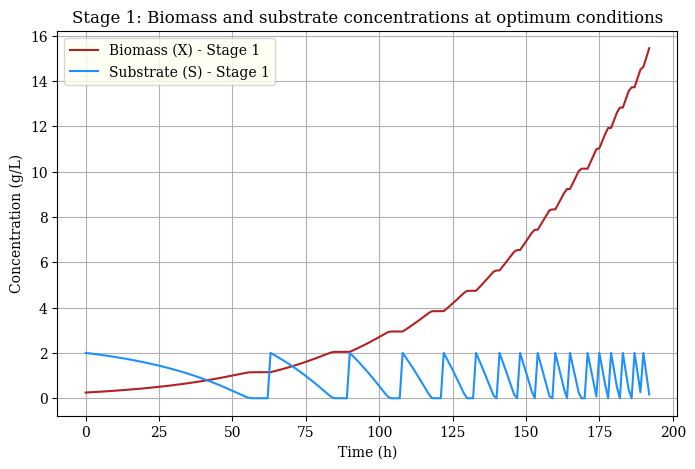


Final biomass from Stage 1 = 15.4428 g/L

[Stage 2] Time = 0.00 h: X = 37000000000.0000 cells/L, S = 2.0000 g/L, P = 0.0000 g/L (astaxanthin)
[Stage 2] Time = 1.00 h: X = 37000000008.9800 cells/L, S = 2.0000 g/L, P = 0.0862 g/L (astaxanthin)
[Stage 2] Time = 2.00 h: X = 37000000017.9600 cells/L, S = 2.0000 g/L, P = 0.1724 g/L (astaxanthin)
[Stage 2] Time = 3.00 h: X = 37000000026.9400 cells/L, S = 2.0000 g/L, P = 0.2586 g/L (astaxanthin)
[Stage 2] Time = 4.00 h: X = 37000000035.9200 cells/L, S = 2.0000 g/L, P = 0.3448 g/L (astaxanthin)
[Stage 2] Time = 5.00 h: X = 37000000044.9000 cells/L, S = 2.0000 g/L, P = 0.4311 g/L (astaxanthin)
[Stage 2] Time = 6.00 h: X = 37000000053.8800 cells/L, S = 2.0000 g/L, P = 0.5173 g/L (astaxanthin)
[Stage 2] Time = 7.00 h: X = 37000000062.8600 cells/L, S = 2.0000 g/L, P = 0.6035 g/L (astaxanthin)
[Stage 2] Time = 8.00 h: X = 37000000071.8400 cells/L, S = 2.0000 g/L, P = 0.6897 g/L (astaxanthin)
[Stage 2] Time = 9.00 h: X = 37000000080.8200 cells/L, S 

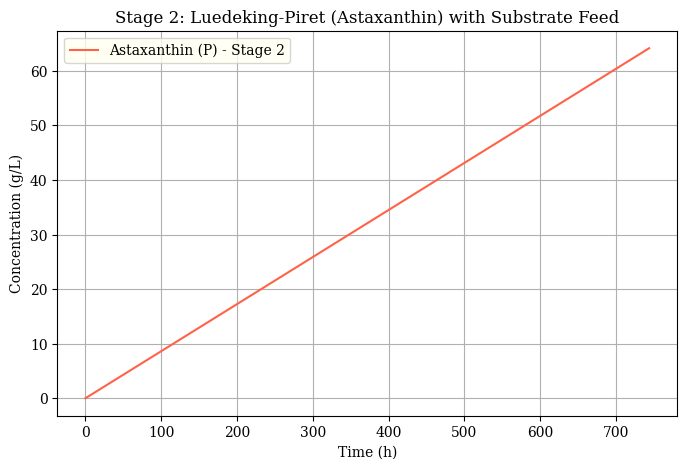

In [18]:
#Initial Monod growth based model with second stage modelling with Luedeking Piret Kinetics
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'

# -- Monod parameters --
mu_max = 0.02833333333 # 1/h 0.02833333333
Ks     = 0.024          # g/L
Yxs    = 0.449          # dimensionless (gX / gS)
X0     = 0.25           # g/L (initial biomass)
S0     = 2            # g/L (initial substrate)

# Define the Monod ODE system
def monod_system(y, t, mu_max, Ks, Yxs):
    """
    y = [X, S]
    """
    X, S = y
    # Growth rate
    mu   = mu_max * S / (Ks + S)
    # Biomass balance
    dXdt = mu * X
    # Substrate balance
    dSdt = -(1.0 / Yxs) * mu * X
    return [dXdt, dSdt]

def simulate_with_feed_monod(mu_max, Ks, Yxs, X0, S0, t_final=76, dt=1.0):
    """
    Simulate up to t_final in increments of dt.
    Whenever S <= 0, reset S to S0 (feed).
    Returns arrays of time, X, S.
    """
    # Arrays to store the results
    time_points = [0]
    X_values    = [X0]
    S_values    = [S0]

    # Current state and time
    current_state = [X0, S0]
    current_time  = 0.0

    while current_time < t_final:
        # Integrate from current_time to current_time + dt
        t_span = np.linspace(current_time, current_time + dt, 2)

        # Solve ODEs
        sol = odeint(monod_system, current_state, t_span, args=(mu_max, Ks, Yxs))

        # The last solution point = state at t = current_time + dt
        X_end, S_end = sol[-1]

        # If substrate is depleted, reset it to feed concentration
        if S_end <= 0:
            S_end = S0

        # Update "current" time and state
        current_time  += dt
        current_state = [X_end, S_end]

        # Store
        time_points.append(current_time)
        X_values.append(X_end)
        S_values.append(S_end)

        # If we've reached or exceeded final time, break
        if current_time >= t_final:
            break

    return np.array(time_points), np.array(X_values), np.array(S_values)

# -- Run the first stage simulation (e.g., up to 192 h) --
t1_final = 192
t1_sim, X1_sim, S1_sim = simulate_with_feed_monod(
    mu_max, Ks, Yxs,
    X0, S0,
    t_final=t1_final, dt=1.0
)

# Print the results at each step (optional)
for i in range(len(t1_sim)):
    print(f"[Stage 1] Time = {t1_sim[i]:.2f} h: , X = {X1_sim[i]:.4f} g/L, S = {S1_sim[i]:.4f} g/L")


# Plot results from Stage 1
plt.figure(figsize=(8, 5))
plt.plot(t1_sim, X1_sim, color='firebrick', label='Biomass (X) - Stage 1')
plt.plot(t1_sim, S1_sim, color='dodgerblue', label='Substrate (S) - Stage 1')
plt.xlabel('Time (h)')
plt.ylabel('Concentration (g/L)')
plt.title('Stage 1: Biomass and substrate concentrations at optimum conditions')
plt.legend(facecolor='ivory')
plt.grid(True)
plt.show()

# Get the final biomass concentration from Stage 1
X_final_stage1 = X1_sim[-1]
print(f"\nFinal biomass from Stage 1 = {X_final_stage1:.4f} g/L\n")

# ------------------------------------------------------------------------------
# 2) SECOND STAGE OF CULTIVATION (Luedeking-Piret for Astaxanthin)
#check values and units/ need to make sure it converts to the right amount of cells or concentration
alpha = 0.00  # gP/gX
beta  = 0.0002 # 1/h
# Define the extended system: [X, S, P]
def luedeking_piret_system(y, t, mu_max, Ks, Yxs, alpha, beta):
    """
    y = [X, S, P]
    """
    X, S, P = y
    # Growth rate (Monod)
    mu = mu_max * S / (Ks + S)
    # dX/dt
    dXdt = mu * X
    # dS/dt
    dSdt = -(1.0 / Yxs) * mu * X*0.1
    # dP/dt (Luedeking-Piret)
    dPdt = alpha * dXdt + beta *X

    return [dXdt, dSdt, dPdt]

def simulate_with_feed_lp(mu_max, Ks, Yxs, alpha, beta,
                          X0, S0, P0=0.0, t_final=312, dt=1.0):
    """
    Simulate second stage with Luedeking-Piret product formation.
    We feed substrate whenever S <= 0, resetting to S0.
    Returns arrays of time, X, S, P.
    """
    # Store results
    time_points = [0]
    X_values    = [X0]
    S_values    = [S0]
    P_values    = [P0]

    current_state = [X0, S0, P0]
    current_time  = 0

    while current_time < t_final:
        t_span = np.linspace(current_time, current_time + dt, 2)
        sol = odeint(luedeking_piret_system, current_state, t_span,
                     args=(mu_max, Ks, Yxs, alpha, beta))

        # Last point in the small interval
        X_end, S_end, P_end = sol[-1]

        # If substrate depleted, reset it
        if S_end <= 0:
            S_end = S0

        current_time  += dt
        current_state = [X_end, S_end, P_end]

        time_points.append(current_time)
        X_values.append(X_end)
        S_values.append(S_end)
        P_values.append(P_end)

        if current_time >= t_final:
            break

    # Only feed at the end of the interval if needed
    if S_values[-1] <= 0:
        S_values[-1] = S0
        feed_events.append(time_points[-1])

    return (np.array(time_points),
            np.array(X_values),
            np.array(S_values),
            np.array(P_values))

X0_stage2 = X_final_stage1   # final from Stage 1
S0_stage2 = 2
P0_stage2 = 0.0  #no initial product
t2_final = 744 # how many hours we run stage 2
t2_sim, X2_sim, S2_sim, P2_sim = simulate_with_feed_lp(
    mu_max, Ks, Yxs, alpha=0, beta=2.33e-12,
    X0=3.7e10, S0=S0_stage2, P0=P0_stage2, #using cell density for whole month
    t_final=t2_final, dt=1
)

# Print results from Stage 2
for i in range(len(t2_sim)):
    print(f"[Stage 2] Time = {t2_sim[i]:.2f} h: "
          f"X = {X2_sim[i]:.4f} cells/L, "
          f"S = {S2_sim[i]:.4f} g/L, "
          f"P = {P2_sim[i]:.4f} g/L (astaxanthin)")

# Plot Stage 2
plt.figure(figsize=(8, 5))
#plt.plot(t2_sim, X2_sim, linestyle='-', color='seagreen', label='Biomass (X) - Stage 2')
#plt.plot(t2_sim, S2_sim, linestyle='-', color='deepskyblue', label='Substrate (S) - Stage 2')
plt.plot(t2_sim, P2_sim, linestyle='-', color='tomato', label='Astaxanthin (P) - Stage 2')
plt.xlabel('Time (h)')
plt.ylabel('Concentration (g/L)')
plt.title('Stage 2: Luedeking-Piret (Astaxanthin) with Substrate Feed')
plt.legend(facecolor='ivory')
plt.grid(True)
plt.show()

========== 8-Day Blocks with Highest and Lowest Solar Index ==========

HIGHEST 8-DAY BLOCK: sum = 2942.12
  dec_2024 Day 17: 369.21
  dec_2024 Day 18: 369.21
  dec_2024 Day 19: 369.21
  dec_2024 Day 20: 369.21
  dec_2024 Day 21: 365.74
  dec_2024 Day 22: 369.21
  dec_2024 Day 23: 362.27
  dec_2024 Day 24: 368.06

LOWEST 8-DAY BLOCK: sum = 799.77
  jun_2024 Day 5: 121.53
  jun_2024 Day 6: 112.27
  jun_2024 Day 7: 108.80
  jun_2024 Day 8: 89.12
  jun_2024 Day 9: 87.96
  jun_2024 Day 10: 93.75
  jun_2024 Day 11: 79.86
  jun_2024 Day 12: 106.48


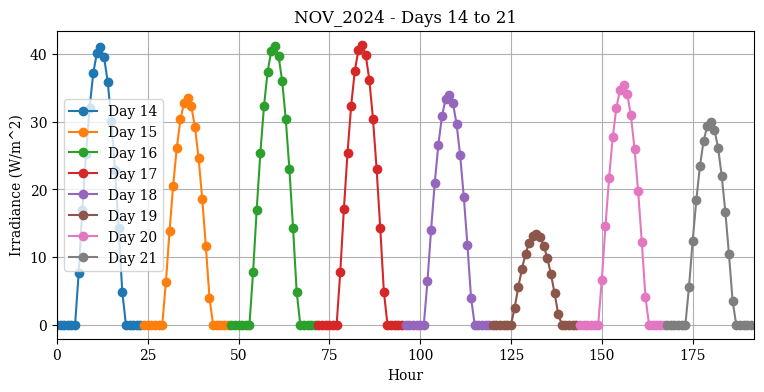

In [19]:
#Packages
from scipy.integrate import odeint
import math
import matplotlib as plt
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

#data for solar irradiation in W/m^2
jan_2024= [358.8, 200.23, 363.43, 365.74, 365.74, 364.58, 329.86, 363.43, 362.27, 362.27, 340.28, 359.95, 333.33, 350.69, 355.32, 356.48, 351.85, 282.41, 331.02, 354.17, 348.38, 350.69, 349.54, 348.38, 344.91, 343.75, 344.91, 313.66, 340.28, 340.28, 339.12]
feb_2024 =[337.96, 335.65, 325.23, 327.55, 334.49, 332.18, 331.02, 328.7, 326.39, 325.23, 324.07, 321.76, 320.6, 309.03, 307.87, 261.57, 307.87, 215.28, 246.53, 302.08, 226.85, 303.24, 295.14, 71.76, 130.79, 281.25, 288.19, 243.06, 289.35]
mar_2024 =[290.51, 158.56, 209.49, 217.59, 282.41, 280.09, 268.52, 178.24, 271.99, 270.83, 267.36, 219.91, 241.9, 239.58, 224.54, 258.1, 243.06, 252.31, 250.0, 248.84, 246.53, 243.06, 241.9, 239.58, 237.27, 234.95, 232.64, 230.32, 216.44, 204.86, 223.38]
apr_2024 =[218.75, 223.38, 221.06, 200.23, 215.28, 178.24, 210.65, 211.81, 201.39, 208.33, 206.02, 126.16, 202.55, 189.81, 194.44, 196.76, 194.44, 193.29, 190.97, 189.81, 188.66, 170.14, 179.4, 179.4, 135.42, 180.56, 167.82, 162.04, 174.77, 54.4]
may_2024 =[112.27, 123.84, 103.01, 155.09, 165.51, 151.62, 166.67, 156.25, 85.65, 152.78, 128.47, 108.8, 134.26, 153.94, 156.25, 155.09, 155.09, 153.94, 144.68, 127.31, 137.73, 131.94, 141.2, 144.68, 130.79, 133.1, 109.95, 78.7, 96.06, 103.01, 119.21]
jun_2024 =[142.36, 126.16, 126.16, 107.64, 121.53, 112.27, 108.8, 89.12, 87.96, 93.75, 79.86, 106.48, 137.73, 137.73, 133.1, 118.06, 127.31, 116.9, 136.57, 137.73, 136.57, 129.63, 113.43, 134.26, 137.73, 91.44, 82.18, 131.94, 96.06, 138.89]
jul_2024 =[136.57, 135.42, 140.05, 129.63, 141.2, 85.65, 100.69, 127.31, 112.27, 106.48, 122.69, 106.48, 141.2, 77.55, 148.15, 149.31, 127.31, 108.8, 119.21, 115.74, 116.9, 128.47, 106.48, 129.63, 116.9, 149.31, 148.15, 109.95, 109.95, 134.26, 151.62]
aug_2024 =[158.56, 131.94, 166.67, 170.14, 170.14, 138.89, 129.63, 144.68, 162.04, 178.24, 165.51, 150.46, 129.63, 106.48, 128.47, 144.68, 67.13, 152.78, 130.79, 131.94, 160.88, 142.36, 121.53, 155.09, 151.62, 130.79, 156.25, 199.07, 170.14, 178.24, 182.87]
sep_2024 =[136.57, 216.44, 162.04, 186.34, 123.84, 193.29, 197.92, 219.91, 179.4, 211.81, 233.8, 236.11, 237.27, 239.58, 240.74, 243.06, 245.37, 246.53, 245.37, 246.53, 253.47, 255.79, 258.1, 244.21, 261.57, 259.26, 145.83, 233.8, 239.58, 270.83]
oct_2024 =[267.36, 200.23, 136.57, 200.23, 253.47, 274.31, 282.41, 241.9, 287.04, 290.51, 285.88, 266.2, 285.88, 217.59, 236.11, 194.44, 251.16, 255.79, 263.89, 163.19, 282.41, 240.74, 311.34, 315.97, 318.29, 318.29, 320.6, 322.92, 324.07, 326.39, 327.55]
nov_2024 =[317.13, 216.44, 332.18, 284.72, 262.73, 265.05, 326.39, 234.95, 254.63, 320.6, 343.75, 287.04, 336.81, 347.22, 283.56, 349.54, 350.69, 288.19, 113.43, 299.77, 253.47, 335.65, 357.64, 357.64, 358.8, 359.95, 361.11, 362.27, 225.69, 325.23]
dec_2024 =[315.97, 259.26, 204.86, 329.86, 355.32, 366.9, 361.11, 359.95, 366.9, 369.21, 369.21, 369.21, 247.69, 369.21, 311.34, 312.5, 369.21, 369.21, 369.21, 369.21, 365.74, 369.21, 362.27, 368.06, 353.01, 368.06, 369.21, 369.21, 212.96, 369.21, 366.9]
monthly_data_2024 = {  "jan_2024": jan_2024,  "feb_2024": feb_2024,  "mar_2024": mar_2024,  "apr_2024": apr_2024,  "may_2024": may_2024,  "jun_2024": jun_2024,  "jul_2024": jul_2024,"aug_2024": aug_2024,  "sep_2024": sep_2024, "oct_2024": oct_2024, "nov_2024": nov_2024, "dec_2024": dec_2024}
sunrise_sunset_by_month = {"jan_2024": (5, 19.5),    "feb_2024": (5.5, 19.5),  "mar_2024": (5.4, 19),     "apr_2024": (6, 18.5),  "may_2024": (6.5, 18),
                           "jun_2024": (7, 17.5),  "jul_2024": (7, 17.5),  "aug_2024": (7, 18),  "sep_2024": (6.5, 18.5),   "oct_2024": (5.5, 18.5),
    "nov_2024": (5.2, 18.5), "dec_2024": (5, 19.0)  }
def daily_sine_profile(daily_avg_w, sunrise, sunset):
    """
    Given a single day's average solar irradiance (W/m^2),
    return a 24-element list of hourly values forming a half-sinusoid
    """
    daylight_hours = sunset - sunrise
    # Solve amplitude A so area under half-sine is the global solar index
    A = (daily_avg_w  * math.pi) / (2.0 * daylight_hours)
    profile = []
    for hour in range(24):
        if hour < sunrise or hour >= sunset:
            # Night
            profile.append(0.0)
        else:
            # Map hour -> [0..pi] in sine argument
            theta = math.pi * ((hour - sunrise) / daylight_hours)
            val = A * math.sin(theta)
            profile.append(val)
    return profile
def monthly_sine_profiles(daily_avg_list, sunrise, sunset):
    profiles = []
    for day_avg in daily_avg_list:
        day_profile = daily_sine_profile(day_avg, sunrise, sunset)
        profiles.append(day_profile)
    return profiles
months_to_run = ["jan_2024", "feb_2024", "mar_2024", "apr_2024", "may_2024", "jun_2024", "jul_2024", "aug_2024", "sep_2024",
                 "oct_2024", "nov_2024", "dec_2024"]
simulation_results = {}# store here
for month_name in months_to_run:
    daily_averages = monthly_data_2024[month_name]
    # Retrieve sunrise and sunset for this month
    sunrise, sunset = sunrise_sunset_by_month[month_name]
    # Build the daily profiles for each day in the month
    month_profiles = monthly_sine_profiles(daily_averages, sunrise, sunset)
    simulation_results[month_name] = month_profiles

plt.rcParams["font.family"] = "serif"
def find_extreme_8day_blocks(monthly_data):
    """
    Find the 8 consecutive days with the highest total solar index
    and the 8 consecutive days with the lowest total solar index.
    """
    month_order = ["jan_2024", "feb_2024", "mar_2024", "apr_2024","may_2024", "jun_2024", "jul_2024", "aug_2024", "sep_2024", "oct_2024", "nov_2024", "dec_2024"]
    #flatten days into a list
    all_days = []
    month_lengths = []
    for m in month_order:
        if m not in monthly_data:
            continue
        daily_list = monthly_data[m]
        all_days.extend(daily_list)
        month_lengths.append(len(daily_list))
    total_days = len(all_days)
    # If the total number of days < 8, we can't form an 8-day block
    if total_days < 8:
        print("Not enough total days to form an 8-day block.")
        return
    best_sum = float("-inf")
    best_start_index = None
    worst_sum = float("inf")
    worst_start_index = None
    for start_idx in range(total_days - 8 + 1):
        window = all_days[start_idx : start_idx + 8]
        window_sum = sum(window)
        if window_sum > best_sum:
            best_sum = window_sum
            best_start_index = start_idx
        if window_sum < worst_sum:
            worst_sum = window_sum
            worst_start_index = start_idx
    # --- 3) HELPER: Convert a global "day index" to (month, day_in_month) ---
    def index_to_month_day(global_idx):
        """
        Given a 0-based day index in the flattened list,
        return (month_name, day_number_in_month) as a tuple.
        E.g. ( "jun_2024", 5 ).
        """
        cum = 0
        for i, m in enumerate(month_order):
            # skip months not in the dictionary if we want
            if m not in monthly_data:
                continue
            length = len(monthly_data[m])
            if global_idx < cum + length:
                # so the day is in month_order[i]
                day_in_month = global_idx - cum + 1  # +1 because days are 1-based
                return (m, day_in_month)
            cum += length
        # If for some reason out of range, return something
        return ("unknown_month", -1)
    # Extract the day indices for the best and worst blocks ---
    best_block_indices = list(range(best_start_index, best_start_index + 8))
    worst_block_indices = list(range(worst_start_index, worst_start_index + 8))
    # --- 5) Print Results ---
    print("========== 8-Day Blocks with Highest and Lowest Solar Index ==========")
    print(f"\nHIGHEST 8-DAY BLOCK: sum = {best_sum:.2f}")
    for idx in best_block_indices:
        month_name, day_num = index_to_month_day(idx)
        value = all_days[idx]
        print(f"  {month_name} Day {day_num}: {value:.2f}")
    print(f"\nLOWEST 8-DAY BLOCK: sum = {worst_sum:.2f}")
    for idx in worst_block_indices:
        month_name, day_num = index_to_month_day(idx)
        value = all_days[idx]
        print(f"  {month_name} Day {day_num}: {value:.2f}")
    print("======================================================================")
find_extreme_8day_blocks(monthly_data_2024)
#so these days represent most solar energy vs least average solar energy
import math
import matplotlib.pyplot as plt



#####Running simulation################################################
plt.rcParams["font.family"] = "serif"
month_name = "nov_2024"
days_to_plot = 8 ####### 8 days for green stage batch time, but can choose any in theory
start_day_1_based = 14 #simulating in november, for example where we have highest biomass yield in the month
start_day_index = start_day_1_based - 1
# 24-hour profiles for all days in the chosen month
month_profiles = simulation_results[month_name]
total_days_in_month = len(month_profiles)
plt.figure(figsize=(9, 4))
hours_in_day = 24
for i in range(days_to_plot):
    # The actual day index in the list of daily profiles
    actual_day_idx = start_day_index + i
    if actual_day_idx >= total_days_in_month:
        break
    day_profile = month_profiles[actual_day_idx]
    #Build x-values from i*24..(i*24+23) so each day is appended continuously
    x_values = [i * hours_in_day + h for h in range(hours_in_day)]
    #The label can show the "true" day number (actual_day_idx+1)
    plt.plot(x_values, day_profile, marker='o',
             label=f"Day {actual_day_idx+1}")
plt.title(f"{month_name.upper()} - Days {start_day_1_based} to {start_day_1_based + days_to_plot - 1}")
plt.xlabel("Hour")
plt.ylabel("Irradiance (W/m^2)")
plt.grid(True)
plt.legend()
plt.xlim(0, days_to_plot * hours_in_day)
plt.show()

In [20]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt

###make sure the days in here match the days in the solar irradiation to avoid
#issues with array mismatch


plt.rcParams["font.family"] = "serif"
month_name      = "nov_2024"
start_day_1base = 14
days_to_plot    = 8
start_day_index = start_day_1base - 1
month_profiles  = simulation_results[month_name]  #list of daily 24h arrays
total_days      = len(month_profiles)

# Build one big array of length 192 with the hourly irradiance
hours_in_day = 24
I0_block = []
for i in range(days_to_plot):
    actual_day_idx = start_day_index + i
    if actual_day_idx >= total_days:
        break  # no more data
    day_profile = month_profiles[actual_day_idx]
    I0_block.extend(day_profile)  # append the 24 values
I0_block = np.array(I0_block)
final_time = len(I0_block)  #print this to check the amount of hours matches in the simulation
print(len(np.array(I0_block)))


192


In [21]:
#function for solar irradiance at that instant

def get_I0(t):
    # round or int() t to get an integer index
    idx = int(round(t))
    if idx < 0:
        idx = 0
    if idx >= len(I0_block):
        idx = len(I0_block) - 1
    return I0_block[idx]

In [22]:
#light at the surface of the pond
Z    = 0.3   # pond depth (m)
Ke1  = 0.32 #m^-1 proved from literature paper  Yang
Ke2  = 0.03   #m1^-1 (g/m3 )^-1 ties extinction to X
I_s  = 40  # saturation light intensity, in W/m^2 from Yang paper
def monod_light_system(y, t, mu_max, Ks, Yxs, Z, Ke1, Ke2, I_s):
    """
      - I0(t) from get_I0(...)
      - Beer-Lambert => Ia
      - Light factor => fI
      - Monod => mu
    """
    X, S = y
    # 1) Surface irradiance at time t
    I0_t = get_I0(t)
    # 2) extinction coefficient
    Ke = Ke1 + Ke2 * X
    # 3) depth-averaged irradiance Ia
    if Ke < 1e-9:
        Ia = I0_t
    else:
        Ia = I0_t * (1 - np.exp(-Ke * Z)) / (Ke * Z)
    # 4) light factor
    fI = (Ia / I_s) * np.exp(1 - (Ia / I_s))  #Steeles equation
    mu_monod = mu_max * (S / (Ks + S))
    mu_eff = mu_monod * fI
    # 7) dX/dt, dS/dt
    dXdt = mu_eff * X
    dSdt = -(1.0 / Yxs) * mu_eff * X
    return [dXdt, dSdt]
def simulate_with_feed_monod_light(mu_max, Ks, Yxs, X0, S0,
                                   Z, Ke1, Ke2, I_s,
                                   t_final=192, dt=1.0):  ##match the time of the simulation
                                   #to the time that you have data for in the earlier arrays
    """
    Whenever S <= 0, we reset S to S0 (feed).
    Returns time_points, X_values, S_values.
    """
    time_points = [0]
    X_values    = [X0]
    S_values    = [S0]
    current_state = [X0, S0]
    current_time  = 0.0

    while current_time < t_final:
        # Integrate from current_time to current_time + dt
        t_span = np.linspace(current_time, current_time + dt, 2)

        sol = odeint(monod_light_system,
                     current_state,
                     t_span,
                     args=(mu_max, Ks, Yxs, Z, Ke1, Ke2, I_s))

        X_end, S_end = sol[-1]

        # If substrate is depleted, reset to feed concentration
        if S_end <= 1e-3:
            S_end = S0
        current_time  += dt
        current_state = [X_end, S_end]
        time_points.append(current_time)
        X_values.append(X_end)
        S_values.append(S_end)
        if current_time >= t_final:
            break

    return np.array(time_points), np.array(X_values), np.array(S_values)


Time | Biomass (X) | Substrate (S) | fI
  0.0 |   0.2500 |   2.0000 | 0.0000
  1.0 |   0.2500 |   2.0000 | 0.0000
  2.0 |   0.2500 |   2.0000 | 0.0000
  3.0 |   0.2500 |   2.0000 | 0.0000
  4.0 |   0.2500 |   2.0000 | 0.0000
  5.0 |   0.2500 |   2.0000 | 0.0000
  6.0 |   0.2515 |   1.9968 | 0.4150
  7.0 |   0.2555 |   1.9877 | 0.7319
  8.0 |   0.2614 |   1.9746 | 0.8949
  9.0 |   0.2683 |   1.9592 | 0.9672
 10.0 |   0.2758 |   1.9426 | 0.9928
 11.0 |   0.2836 |   1.9252 | 0.9990
 12.0 |   0.2916 |   1.9073 | 0.9997
 13.0 |   0.2999 |   1.8889 | 0.9982
 14.0 |   0.3083 |   1.8701 | 0.9881
 15.0 |   0.3168 |   1.8512 | 0.9520
 16.0 |   0.3249 |   1.8331 | 0.8579
 17.0 |   0.3319 |   1.8176 | 0.6561
 18.0 |   0.3362 |   1.8079 | 0.2787
 19.0 |   0.3376 |   1.8050 | 0.0000
 20.0 |   0.3376 |   1.8050 | 0.0000
 21.0 |   0.3376 |   1.8050 | 0.0000
 22.0 |   0.3376 |   1.8050 | 0.0000
 23.0 |   0.3376 |   1.8050 | 0.0000
 24.0 |   0.3376 |   1.8050 | 0.0000
 25.0 |   0.3376 |   1.8050 | 0.00

<ipython-input-24-4e24d60ac530>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ":" (-> linestyle=':'). The keyword argument will take precedence.
  l3 = ax2.plot(t_sim, fI_values, ':', color='skyblue', label="f(I)", linestyle='-')


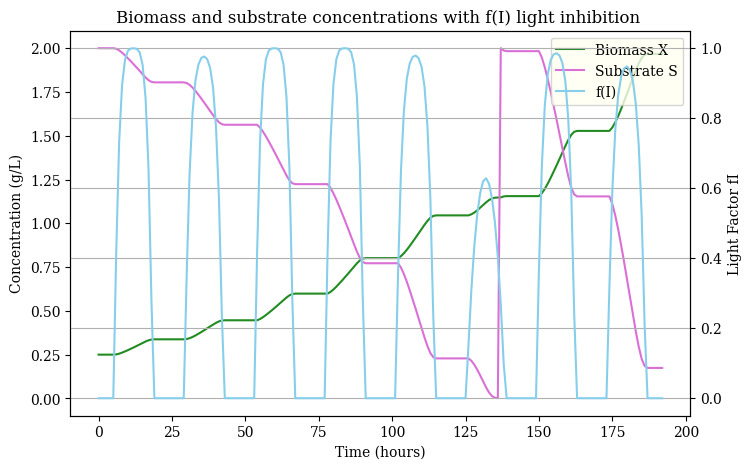

In [24]:
t_sim, X_sim, S_sim = simulate_with_feed_monod_light(mu_max, Ks, Yxs, X0, S0,
                                   Z, Ke1, Ke2, I_s,
                                   t_final=192, dt=1.0) #again make sure time matches
def get_I0(t):
    idx = int(round(t))
    if idx < 0:
        idx = 0
    if idx >= len(I0_block):  # I0_block is your stored array of irradiances
        idx = len(I0_block) - 1
    return I0_block[idx]
fI_values = [] #store the values
for i, t in enumerate(t_sim):
    # current biomass
    X = X_sim[i]
    # compute Ke
    Ke = Ke1 + Ke2 * X
    # surface irradiance
    I0_t = get_I0(t)
    # depth-averaged Ia
    if Ke < 1e-9:
        Ia = I0_t
    else:
        Ia = I0_t * (1 - math.exp(-Ke*Z)) / (Ke*Z)
    # steele's eqn for fI
    fI = (Ia / I_s) * math.exp(1 - Ia / I_s)
    fI_values.append(fI)
fI_values = np.array(fI_values)  #store values
print("\nTime | Biomass (X) | Substrate (S) | fI")
for i in range(len(t_sim)):
    print(f"{t_sim[i]:5.1f} | {X_sim[i]:8.4f} | {S_sim[i]:8.4f} | {fI_values[i]:6.4f}")

fig, ax1 = plt.subplots(figsize=(8,5))
# Plot biomass + substrate on the left axis
color1 = 'forestgreen'
color2 = 'orchid'
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Concentration (g/L)")
l1 = ax1.plot(t_sim, X_sim, color=color1, label="Biomass X")
l2 = ax1.plot(t_sim, S_sim, '-', color=color2, label="Substrate S")
ax1.tick_params(axis='y')
#second axis for fI
ax2 = ax1.twinx()
ax2.set_ylabel("Light Factor fI", color='black')
l3 = ax2.plot(t_sim, fI_values, ':', color='skyblue', label="f(I)", linestyle='-')
ax2.tick_params(axis='y', labelcolor='black')
#combined legend:
lns = l1 + l2 + l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right", facecolor='ivory')

plt.title("Biomass and substrate concentrations with f(I) light inhibition ")
plt.grid(True)
plt.show()

In [25]:
#MAXIMUM TEMPERATURES ARRAY
Jan_max_temp=[27.9, 28.4, 31.6, 31.1, 30.9, 33.4, 36.0, 36.5, 30.6, 31.8, 37.0,  40.7, 36.6, 34.4, 38.3,31.2, 26.8, 27.6, 34.0, 30.3, 28.0,  28.2, 27.7, 28.2, 28.5, 29.8, 34.0, 27.1, 28.1, 36.0, 41.9]
Feb_max_temp=[42.6, 40.4, 32.5, 25.5, 28.1, 32.3, 36.1, 39.9, 42.0, 42.3, 37.5, 34.4, 36.5, 41.7, 27.5, 37.4, 42.9, 42.3, 38.1, 28.2, 32.2, 32.2, 37.7, 25.4, 24.1, 32.3, 26.5, 30.3, 33.5]
Mar_max_temp=[33.8, 31.0, 34.6, 27.0, 32.3, 32.9, 36.0, 27.6, 26.1, 28.0, 31.3, 30.7, 31.5, 29.4, 32.2, 33.5, 28.9, 27.7, 26.7, 29.1, 30.0, 28.7, 27.9, 28.7, 29.3, 31.7, 34.3, 28.8, 26.9, 28.5,29.8]
April_max_temp=[27.6, 29.5, 29.8, 30.6, 33.6, 34.5,36.5, 29.2,27.4, 28.1,28.5,26.4,26.6,28.8, 30.8, 32.6,33.2,30, 31, 31.1,23.3, 22.4,23.5,22.8,23.6,27.4,23.6,25.7,25.8,20]
May_max_temp=[24.9, 25.9,21.6,22.2,21.0,22.1,26.8,26.8,27.5,27.7,25.8,27.1,28.8,28.7,29.4,28.1,28.0,27.6,26.7,24.9,26.7,25.8,26.8, 26.6,24,25.2,21.9,17.4,15.4,19.8,21.6]
June_max_temp=[25.8,20.3,21.5,21.5,23.8,25.0,20.2,20.4,20.4,20.1,17.9,20.8,20.6,21.2,22.7,22,20.5,19.1,18.5,19.0,20.5,19.2,18.1,17.8,17,19.4,17.4,19.9,18.4,19.3]
July_max_temp=[20.3, 18.1, 17.9,17.2, 16.9, 19.9, 20.7, 21.5, 18.1, 18.4, 17.6, 19.8, 17.7, 22.2, 22.8,23.5,16.6, 18.2,20.1, 20.2, 20.26, 16.3, 16, 18.5, 19.3, 20.4, 20.4, 19.9, 21.4,23.1]
Aug_max_temp=[16.9, 17.3, 19.3, 20.2,20.7, 21.1, 19.8, 20.4, 22.4,26.2, 21.5, 20.5, 20.9, 19.4, 18, 21.1, 16.4, 17.7, 17.3, 19.1, 20.4, 21.6, 20, 18.9, 20.6, 20.6, 19.8, 21.4, 19.3, 18.4, 19.4]
Sep_max_temp=[19.2, 25.9, 21.7, 20.7, 15.3, 18.5, 19.9, 20.2, 21.3, 22.2, 25.1, 26.1, 26.9, 28.4, 26.2, 24.3, 24, 28.3, 24.1, 22.3, 21.3, 19.8, 24.6, 22.5,21.7,23.3, 28.6, 17.5, 18.5, 20.9, 24.3]
Oct_max_temp=[29.7,18, 18.1, 20.5, 22.6, 21.8, 23.5, 25.3, 21.8, 23.9, 28, 31.4, 22.2, 25.4, 22.5,21.9, 21.9, 21.3, 22.7, 24.3,22.6,19.7, 21.2, 23.1, 29.6, 23.5,22.5,26.2,31.8, 29.9, 33.3]
Nov_max_temp=[29.5, 23, 22.4, 21.9, 22.2, 20.8, 21.6, 23.4, 23.2, 24.2, 25.6, 24.1, 31.8, 31, 24.5, 28.2, 34.4, 27.8, 25.6, 23, 23.2, 29.4, 36.7, 23.5, 23.3, 28.2, 32.1, 31.6, 29.8]
Dec_max_temp=[23.9, 21.7, 23.2, 24.8, 25.5, 28.1, 34.9, 33.4, 35, 40.4, 37.5, 30.4, 29, 25.4, 24.8, 36.5, 29, 35.2,35,  38, 41.2, 41.2, 43.4, 28.4, 22.9, 23.4, 25, 31.7, 35.1, 33.4, 36.5]
yearly_max_temp=Jan_max_temp+Feb_max_temp+Mar_max_temp+April_max_temp+June_max_temp+July_max_temp+Aug_max_temp+Sep_max_temp+Oct_max_temp+Nov_max_temp+Dec_max_temp
rainy_season_max_temp=May_max_temp+June_max_temp+July_max_temp+Aug_max_temp
dry_season_max_temp=Sep_max_temp+Oct_max_temp+Nov_max_temp+Dec_max_temp+Jan_max_temp+Feb_max_temp+Mar_max_temp+April_max_temp
count=len(Jan_max_temp), len(Feb_max_temp),len(Mar_max_temp), len(April_max_temp), len(May_max_temp), len(June_max_temp), len(July_max_temp), len(Aug_max_temp), len(Sep_max_temp), len(Oct_max_temp), len(Nov_max_temp), len(Dec_max_temp)
print(count)
print(yearly_max_temp)
print(rainy_season_max_temp)
print(dry_season_max_temp)
monthly_data = [Jan_max_temp,Feb_max_temp,Mar_max_temp,April_max_temp,May_max_temp,June_max_temp, July_max_temp, Aug_max_temp,Sep_max_temp,Oct_max_temp,Nov_max_temp,Dec_max_temp
]
daily_data = []
for month_idx, month_array in enumerate(monthly_data, start=1):
    for day_idx, temp in enumerate(month_array, start=1):
        daily_data.append((temp, month_idx, day_idx))
# Now daily_data is a list of length = sum of lengths of all months
window_size = 8
max_sum = float('-inf')
best_start_index = 0  # to remember where the best 8-day block starts
for i in range(len(daily_data) - window_size + 1):
    # Sum the 8 temperatures from daily_data[i] to daily_data[i+7]
    window_sum = sum(daily_data[j][0] for j in range(i, i + window_size))
    if window_sum > max_sum:
        max_sum = window_sum
        best_start_index = i
# Extract the 8 consecutive days
best_8day_block = daily_data[best_start_index : best_start_index + 8]
print("The 8 consecutive days with the highest total temperature:")
print(f"Total Temperature (sum) = {max_sum:.1f}\n")
for day_offset, (temp, month, day_in_month) in enumerate(best_8day_block, start=1):
    print(
        f"Day {day_offset} in this 8-day block -> "
        f"Temp: {temp}°C on Month {month}, Day {day_in_month}")

#MINIMUM TEMPERATURES
Jan_min_temp = [17.3, 17.9, 19.1, 16.2, 16.2, 17.7, 18.1, 20.1, 18.1, 17.3, 19.0, 19.3, 23.2, 23.3, 22.3, 21.7, 23.4, 21.2, 21.4, 17.8, 19.0, 15.9, 16.6, 17.5, 17.4, 16.3, 17.0, 17.1, 17.1, 18.0, 19.2]
Feb_min_temp = [21.7, 20.5, 22.7, 15.9, 15.1, 16.4, 17.4, 17.4, 19.9, 20.5, 18.7, 19.0, 16.5, 17.3, 22.4, 21.2, 17.2, 23.4, 27.5, 20.8, 19.2, 17.4, 17.9, 21.6, 20.0, 20.6, 17.4, 17.3, 15.9]
Mar_min_temp = [19.5, 20.0, 23.7, 21.1, 18.3, 18.1, 21.8, 23.0, 14.1, 15.5, 16.6, 18.7, 20.4, 20.5, 21.0, 21.2, 16.2, 17.6, 14.7, 14.3, 15.7, 16.9, 16.0, 15.6, 11.4, 10.8, 12.2, 12.5, 12.5, 16.6, 16.5]
Apr_min_temp = [15.0, 14.3, 14.2, 16.2, 16.1, 15.9, 16.8, 17.1, 14.6, 15.4, 16.0, 15.7, 15.0, 10.7, 13.3, 15.4, 18.3, 17.7, 13.3, 11.7, 9.9, 14.7, 11.6, 13.8, 13.6, 13.7, 11.1, 10.7, 13.7, 16.9]
May_min_temp = [14.8, 18.3, 18.2, 10.3, 8.4, 9.0, 9.4, 12.6, 18.1, 17.1, 16.5, 13.8, 16.4, 17.4, 9.7, 11.5, 13.9, 15.1, 14.2, 11.1, 10.9, 8.6, 6.1, 8.8, 15.9, 12.0, 12.6, 14.4, 10.1, 10.6, 12.8]
Jun_min_temp = [12.1, 14.7, 12.2, 13.6, 15.9, 11.5, 14.3, 12.5, 15.6, 15.2, 14.1, 14.0, 7.9, 8.8, 7.1, 9.5, 10.3, 8.9, 4.8, 3.9, 4.1, 10.1, 7.3, 3.7, 3.4, 6.4, 11.3, 11.9, 9.5, 8.1]
Jul_min_temp = [5.4, 12.6, 3.5, 8.7, 6.6, 6.1, 10.6, 8.9, 14.1, 14.2, 8.5, 8.5, 9.9, 6.8, 5.6, 7.2, 12.5, 12.5, 9.1, 11.2, 13.2, 13.0, 12.4, 4.1, 9.7, 10.6, 11.1, 11.7, 11.0, 11.4, 11.5]
Aug_min_temp = [10.8, 7.4, 4.8, 3.3, 5.9, 10.1, 15.2, 10.6, 10.7, 7.6, 14.7, 15.2, 9.9, 13.5, 12.7, 11.6, 13.1, 10.2, 12.5, 11.8, 10.7, 13.2, 13.5, 13.6, 13.7, 14.1, 15.8, 9.2, 15.4, 11.5, 12.0]
Sep_min_temp = [14.5, 7.1, 10.2, 14.5, 10.3, 8.6, 9.4, 10.3, 10.5, 11.4, 11.5, 12.1, 11.8, 13.7, 12.3, 12.2, 8.1, 9.2, 11.6, 9.0, 7.8, 5.8, 9.5, 12.2, 9.5, 10.7, 13.4, 6.8, 8.3, 7.2]
Oct_min_temp = [9.3, 12.1, 11.7, 13.2, 14.9, 13.9, 11.7, 11.4, 14.4, 12.3, 17.6, 18.0, 13.7, 15.5, 14.5, 10.3, 13.0, 15.7, 12.6, 12.1, 9.8, 9.5, 7.7, 10.8, 11.4, 13.1, 13.5, 14.4, 13.9, 16.3, 15.1]
Nov_min_temp = [14.7, 17.4, 13.1, 12.2, 14.7, 15.6, 10.7, 13.7, 15.7, 10.1, 11.6, 13.7, 12.2, 15.0, 17.4, 11.3, 11.8, 14.9, 19.9, 19.0, 17.3, 15.0, 12.5, 15.5, 16.3, 10.5, 12.8, 16.0, 19.3, 19.0]
Dec_min_temp = [15.5, 14.7, 17.7, 17.5, 13.4, 15.4, 16.4, 18.0, 20.5, 18.5, 21.7, 21.8, 22.9, 19.8, 18.8, 17.1, 15.6, 18.9, 16.7, 15.8, 20.0, 20.8, 25.1, 19.8, 14.9, 11.2, 13.6, 13.8, 17.2, 17.4, 19.6]
Count_min=len(Jan_min_temp), len(Feb_min_temp), len(Mar_min_temp), len(Apr_min_temp), len(May_min_temp), len(Jun_min_temp), len(Jul_min_temp), len(Aug_min_temp), len(Sep_min_temp), len(Oct_min_temp), len(Nov_min_temp), len(Dec_min_temp)
months_data_min = [ Jan_min_temp, Feb_min_temp, Mar_min_temp, Apr_min_temp, May_min_temp, Jun_min_temp, Jul_min_temp, Aug_min_temp, Sep_min_temp, Oct_min_temp, Nov_min_temp, Dec_min_temp]
daily_min_data = []


for month_idx, month_temps in enumerate(months_data_min, start=1):
    for day_idx, temp in enumerate(month_temps, start=1):
        daily_min_data.append((temp, month_idx, day_idx))
window_size = 8
min_sum = float('inf')     # Start with +∞ so any real sum is smaller
best_start_index = 0       # This will store where that 8-day window begins
for i in range(len(daily_min_data) - window_size + 1):
    # Sum the temperatures for days i through i+7
    window_sum = sum(daily_min_data[j][0] for j in range(i, i + window_size))
    # Check if this sum is less than our current best
    if window_sum < min_sum:
        min_sum = window_sum
        best_start_index = i
lowest_8day_block = daily_min_data[best_start_index : best_start_index + 8]
print("The 8 consecutive days with the lowest total (sum) of minimum temperatures:")
print(f"Total Minimum Temperature (sum) = {min_sum:.1f}\n")
for day_offset, (temp, month, day_in_month) in enumerate(lowest_8day_block, start=1):
    print(
        f"Day {day_offset} in this 8-day block -> "
        f"Temp: {temp} °C on Month {month}, Day {day_in_month}" )
print("Hottest 8 days of the days happen on the week of the 7th of February to the 14th of February")
print("Coldest 8 consecutive days of the year happen on the 19th of June to the 26th")
#define a list of month names in order
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
eight_day_windows = []  # will store start indices of valid 8-day blocks
for i in range(len(daily_data) - 8 + 1):
    all_good = True
    for j in range(i, i + 8):
        max_temp = daily_data[j][0]      # from daily_data
        min_temp = daily_min_data[j][0]  # from daily_min_data
        if min_temp < 14 or max_temp > 32:
            all_good = False
            break
    if all_good:
        eight_day_windows.append(i)
if not eight_day_windows:
    print("No 8 consecutive days found where min temp ≥ 18°C and max temp ≤ 30°C.")
else:
    print("Here are the 8-day windows where temperatures stayed in [18°C, 30°C]:")
    for start_idx in eight_day_windows:
        block = daily_data[start_idx : start_idx + 8]
        print(f"\n--- 8-day Block starting at index {start_idx} ---")
        for day_offset, (max_temp, month, day_in_month) in enumerate(block, start=1):
            min_temp = daily_min_data[start_idx + (day_offset - 1)][0]
            # Convert month (1-based) to a friendly name
            month_name = month_names[month - 1]
            # Print the day in "MonthName day_in_month" format
            print(
                f"Day {day_offset} -> "
                f"Min Temp: {min_temp:.1f}°C, "
                f"Max Temp: {max_temp:.1f}°C, "
                f"Date: {month_name} {day_in_month}" )

(31, 29, 31, 30, 31, 30, 30, 31, 31, 31, 29, 31)
[27.9, 28.4, 31.6, 31.1, 30.9, 33.4, 36.0, 36.5, 30.6, 31.8, 37.0, 40.7, 36.6, 34.4, 38.3, 31.2, 26.8, 27.6, 34.0, 30.3, 28.0, 28.2, 27.7, 28.2, 28.5, 29.8, 34.0, 27.1, 28.1, 36.0, 41.9, 42.6, 40.4, 32.5, 25.5, 28.1, 32.3, 36.1, 39.9, 42.0, 42.3, 37.5, 34.4, 36.5, 41.7, 27.5, 37.4, 42.9, 42.3, 38.1, 28.2, 32.2, 32.2, 37.7, 25.4, 24.1, 32.3, 26.5, 30.3, 33.5, 33.8, 31.0, 34.6, 27.0, 32.3, 32.9, 36.0, 27.6, 26.1, 28.0, 31.3, 30.7, 31.5, 29.4, 32.2, 33.5, 28.9, 27.7, 26.7, 29.1, 30.0, 28.7, 27.9, 28.7, 29.3, 31.7, 34.3, 28.8, 26.9, 28.5, 29.8, 27.6, 29.5, 29.8, 30.6, 33.6, 34.5, 36.5, 29.2, 27.4, 28.1, 28.5, 26.4, 26.6, 28.8, 30.8, 32.6, 33.2, 30, 31, 31.1, 23.3, 22.4, 23.5, 22.8, 23.6, 27.4, 23.6, 25.7, 25.8, 20, 25.8, 20.3, 21.5, 21.5, 23.8, 25.0, 20.2, 20.4, 20.4, 20.1, 17.9, 20.8, 20.6, 21.2, 22.7, 22, 20.5, 19.1, 18.5, 19.0, 20.5, 19.2, 18.1, 17.8, 17, 19.4, 17.4, 19.9, 18.4, 19.3, 20.3, 18.1, 17.9, 17.2, 16.9, 19.9, 20.7, 21.5, 18.1, 

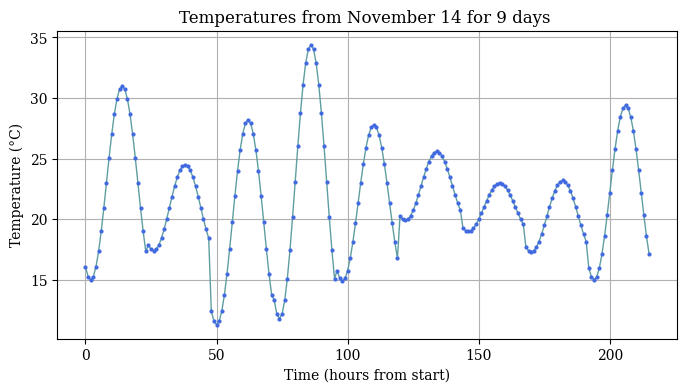

216 216


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#Building dictionary
all_min_temp = {
    'January':  Jan_min_temp, 'February': Feb_min_temp, 'March': Mar_min_temp, 'April': Apr_min_temp, "May": May_min_temp, "June": Jun_min_temp, "July": Jul_min_temp,
    "August": Aug_min_temp, "September": Sep_min_temp, "October": Oct_min_temp, "November": Nov_min_temp, "December":Dec_min_temp}
all_max_temp = { 'January':  Jan_max_temp, 'February': Feb_max_temp, "March": Mar_max_temp, "April": April_max_temp, "May": May_max_temp, "June": June_max_temp, "July": July_max_temp, "August": Aug_max_temp,
 "September": Sep_max_temp, "October": Oct_max_temp, "November": Nov_max_temp, "December": Dec_max_temp}
mpl.rcParams['font.family'] = 'serif'
def daily_temperature_sine(t_hour, T_min, T_max,t_peak=14.0, period=24.0):
    """ Returns the temperature (°C) at time t_hour (in hours of a single day), given a daily minimum T_min and maximum T_max.
  period of 24h
    """
    T_avg = 0.5 * (T_max + T_min)
    A     = 0.5 * (T_max - T_min)
    phase = t_peak - period/4.0  #ensures peak at t_peak
    omega = 2.0 * np.pi / period
    argument = omega * (t_hour - phase)
    return T_avg + A * np.sin(argument)

#Extended simulate function
# This version handles crossing month boundaries: eg lets say we want to do between two months jan and feb
def simulate_temperature_over_days(start_month,start_day,ndays,all_min_dict,all_max_dict,dt_hours=1.0):
    """
    Simulate temperature from day 'start_day' of 'start_month' for 'ndays' total days,    Parameters
    start_month : str
    start_day :The day of the month to start on (1-based).
    all_min_dict : dict Dictionary mapping month name -> list of daily min temps.
    all_max_dict :  mapping month name -> list of daily max temps.
    Temperatures at each time step (same length as time_array).
    """
    # 1) Define the month order and the number of days in each month.
    months_in_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December" ]
    month_lengths = { "January": 31, "February": 28, "March": 31, "April": 30,"May": 31,    "June": 30,     "July": 31,  "August": 31,  "September": 30, "October": 31, "November": 30, "December": 31}
    #identify the starting month index and day
    current_month_idx = months_in_order.index(start_month)
    current_day = start_day
    # 3) Prepare arrays to store results
    time_array = []
    temperature_array = []
    current_hour = 0.0
    # 4)Loop over each "day" in the total range
    for day_count in range(ndays):
        current_month = months_in_order[current_month_idx]
        T_min_today = all_min_dict[current_month][current_day - 1]
        T_max_today = all_max_dict[current_month][current_day - 1]
        # 5)Go hour by hour within this day
        hours_in_day = int(24 / dt_hours)
        for i_hour in range(hours_in_day):
            sub_day_hour = i_hour * dt_hours  # from 0 up to < 24
            temp_now = daily_temperature_sine(sub_day_hour, T_min_today, T_max_today)
            # Store results
            time_array.append(current_hour)
            temperature_array.append(temp_now)
            current_hour += dt_hours
        # 6) Move to the next calendar day
        current_day += 1
        # If we've passed the end of the current month, move to next month
        if current_day > month_lengths[current_month]:
            current_day = 1
            current_month_idx += 1
            if current_month_idx >= 12:
                current_month_idx = 0
    return np.array(time_array), np.array(temperature_array) #CHECK by printing
#for example, March would be the closest to the ideal tempeartures for h.pluvialis growth
if __name__ == '__main__':
    start_month = 'November' #make sure you call the right month too from the light irradiation data
    start_day = 14
    ndays =9 #batch time here would need to be longer to ensure no array mismatch and make sure enough vlaues
    dt_hours = 1.0
    t_hr, Tvals = simulate_temperature_over_days(start_month,start_day,ndays,all_min_temp,all_max_temp, dt_hours=dt_hours)
    plt.figure(figsize=(8,4))
    plt.plot(t_hr, Tvals, marker='o', markersize=2, linewidth=1, color='cadetblue', markerfacecolor='royalblue', markeredgecolor="royalblue")
    plt.xlabel('Time (hours from start)')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperatures from {start_month} {start_day} for {ndays} days ')
    plt.grid(True)
    plt.show()
print(len(np.array(t_hr)), len(np.array(Tvals)))



In [28]:
def print_temperature_range_for_month(month, all_min_dict, all_max_dict):
    """Prints the lowest minimum temperature and the highest maximum temperature recorded for the specified month.
    """
    min_temps = all_min_dict[month]
    max_temps = all_max_dict[month]
    monthly_min = min(min_temps)
    monthly_max = max(max_temps)
    print(f"{month} temperature range: {monthly_min}°C to {monthly_max}°C")

print_temperature_range_for_month('November', all_min_temp, all_max_temp)


November temperature range: 10.1°C to 36.7°C


Threshold 32.19939334376295


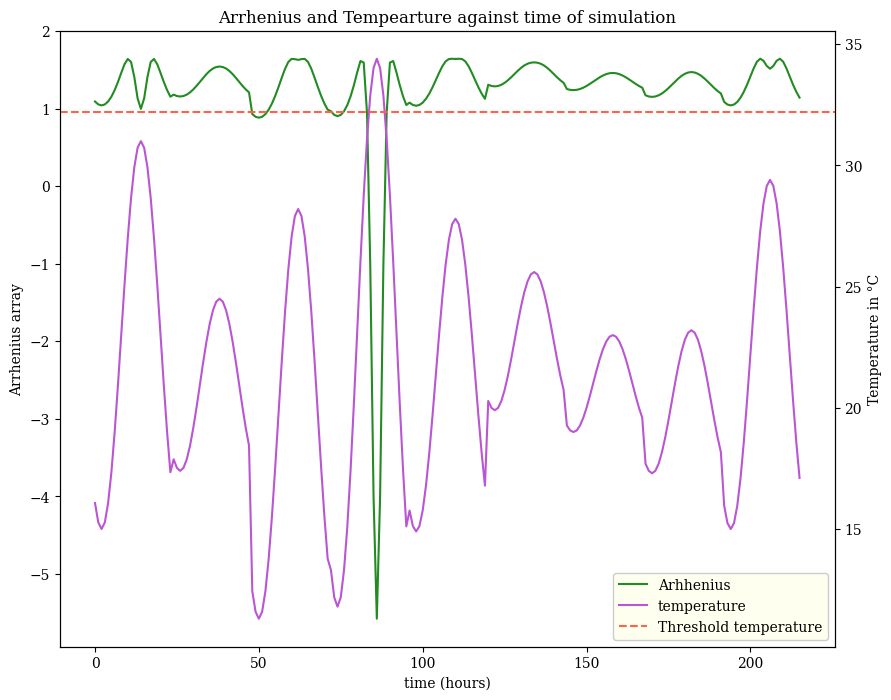

Range: 7.219314913976102
23.099999999999998


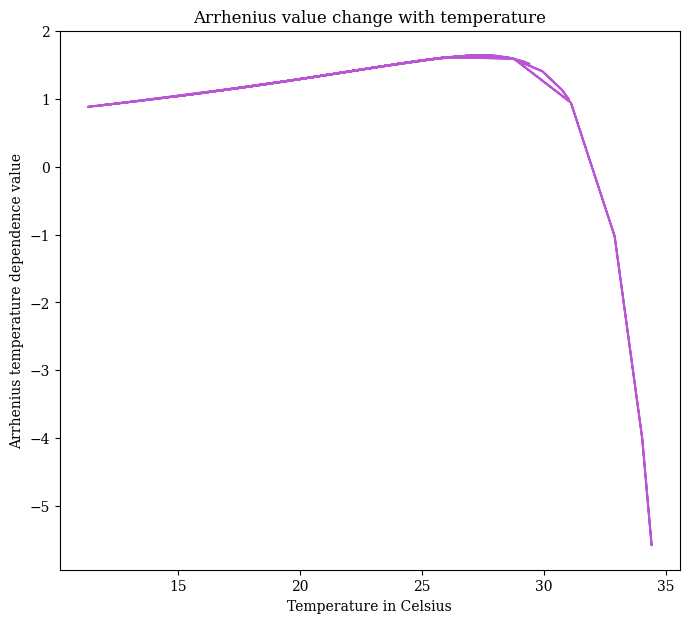

In [29]:
#ARRHENIUS TEMPERATURE DEPENDENCE
plt.rcParams['font.family'] = 'serif'
#Ea is in Kj/mol
#since this model is already temperature dependent, negative effect at higher temperatures
#Eb is kj/mol keep consistent units
#A is per hour
#B is per hour
#parameters from the Dynamical modelling of H.pluvialis for astaxanthin production in both PBR paper (Zhang)
def arrhenius_mu_max(T_c=Tvals, A=3.35*10**5, Ea=30.38*1000, R=8.314, Eb=465.17*1000, B=8.038*10**79):
  T_K=T_c+273.15 #conversion from Celsius to Kelvin for Arrhenius
  T_thresh = ((Ea - Eb) / (R * np.log(A / B))) - 273.15
  print('Threshold',T_thresh )
  temps_array=[]
  #print(T_K)
  for i in range(int(len(T_K))):
    temperature=T_K[i]
    arrhenius=A*np.exp(-Ea/(R*temperature))-B*np.exp(-Eb/(R*temperature))
    temps_array.append(arrhenius)
  return temps_array, T_thresh
arrhenius_array, T_thresh =arrhenius_mu_max(T_c=Tvals)
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10,8))
# Plot data on the primary y-axis
ax1.plot(t_hr, arrhenius_array, color='forestgreen', label='Arhhenius')
ax1.set_xlabel('time (hours)', color='black')
ax1.set_ylabel('Arrhenius array', color='black')
ax1.tick_params(axis='y', labelcolor='black')
# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(t_hr, Tvals, color="mediumorchid", label='temperature')
plt.axhline(y=T_thresh, color='tomato', linestyle='--', label='Threshold temperature')
ax2.set_ylabel('Temperature in °C', color="black")
ax2.tick_params(axis='y', labelcolor='black')
# Add a title and grid (optional)
plt.title('Arrhenius and Tempearture against time of simulation')
# Combine legends from both axes (optional)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right', facecolor='ivory', framealpha=1)
# Show the plot
plt.show()
### Plot of Temp variation vs the arrhenius vlaues
plt.figure(figsize=(8,7))
plt.plot(Tvals, arrhenius_array, color='mediumorchid', linestyle='-')
plt.ylabel("Arrhenius temperature dependence value")
plt.xlabel("Temperature in Celsius")
plt.title("Arrhenius value change with temperature")
data_range = np.ptp(arrhenius_array)  # This calculates max(arr) - min(arr)
print("Range:", data_range)
temperature_range=np.ptp(Tvals)
print(temperature_range)

In [30]:
def modify_arrhenius(arrhenius_array, negative_duration_threshold=72, KdX=0.1):
  #modified arrhenius function to handle negative values in the ODE solver
    effective = np.array(arrhenius_array).copy()
    n = len(effective)
    i = 0
    while i < n:
        if effective[i] < 0:
            start = i
            while i < n and effective[i] < 0:
                i += 1
            run_length = i - start
            if run_length < negative_duration_threshold:
                effective[start:i] = 0.0
            else:
                effective[start:start+negative_duration_threshold] = 0.0
                effective[start+negative_duration_threshold:i] = -KdX
        else:
            i += 1
    return effective


Threshold 32.19939334376295


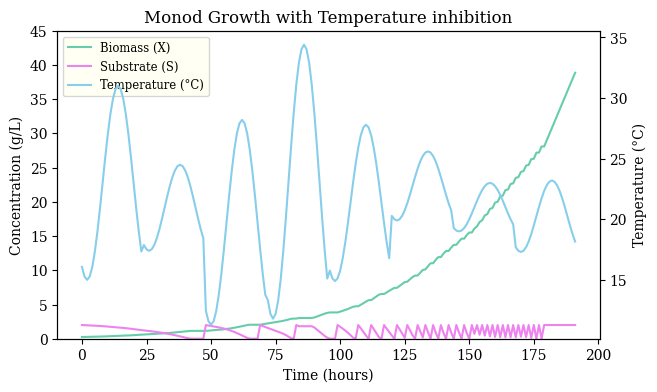

In [31]:
#MONOD with TEMPERATURE DEPENDENCE TERM
def monod_system(y, t, effective_arrhenius_array, Ks, Yxs):
    """
    y = [X, S]
    We pick mu_max(t) from the effective_arrhenius_array using the integer part of t (hourly resolution).
    """
    X, S = y
    mu_max=0.02833333333
    hour_idx = int(np.floor(t))
    if hour_idx >= len(effective_arrhenius_array):
        hour_idx = len(effective_arrhenius_array) - 1  # clip to last value if t exceeds provided array
    mu_max_t = effective_arrhenius_array[hour_idx] # arrhenius_array[hour_idx]
    # Monod kinetics
    mu = mu_max_t * mu_max* S / (Ks + S)
    dXdt = mu * X
    dSdt = -(1.0 / Yxs) * mu * X
    return [dXdt, dSdt]

def simulate_with_feed_monod(effective_arrhenius_array, Ks, Yxs, X0, S0, t_final=720, dt=1.0):
    """
    Simulate in hourly steps. We feed whenever S <= 0 (reset S to S0).
    """
    time_points = [0]
    X_values = [X0]
    S_values = [S0]
    current_state = [X0, S0]
    current_time = 0.0
    while current_time < t_final:
        t_span = np.linspace(current_time, current_time + dt, 2)
        sol = odeint(
            monod_system,           # the ODE system
            current_state,          # initial state
            t_span,                 # integration over one hour
            args=(effective_arrhenius_array, Ks, Yxs)
        )
        X_end, S_end = sol[-1]
        # Feed if substrate is depleted
        if S_end <= 0:
            S_end = S0
        current_time += dt
        current_state = [X_end, S_end]
        time_points.append(current_time)
        X_values.append(X_end)
        S_values.append(S_end)

    return np.array(time_points), np.array(X_values), np.array(S_values)
arrhenius_array, T_thresh = arrhenius_mu_max(T_c=Tvals)
effective_arrhenius_array = modify_arrhenius(arrhenius_array, negative_duration_threshold=72, KdX=10)
Ks  = 0.024   # g/L
Yxs = 0.449   # yield (gX/gS)
X0  = 0.25    # initial biomass (g/L)
S0  = 2    # initial substrate (g/L)

t_sim, X_sim, S_sim = simulate_with_feed_monod(effective_arrhenius_array, Ks, Yxs, X0, S0, t_final=191, dt=1.0)
fig, ax1 = plt.subplots(figsize=(7, 4))
ax1.plot(t_sim, X_sim, label='Biomass (X)', color='mediumaquamarine')
ax1.plot(t_sim, S_sim, label='Substrate (S)', color='violet')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Concentration (g/L)')
ax2 = ax1.twinx()
ax2.plot(t_sim, Tvals[:len(t_sim)], label='Temperature (°C)', color='skyblue', linestyle='-', alpha=1)
ax2.set_ylabel('Temperature (°C)')
lines_ax1, labels_ax1 = ax1.get_legend_handles_labels()
lines_ax2, labels_ax2 = ax2.get_legend_handles_labels()
ax1.set_ylim(0, 45)

all_lines = lines_ax1 + lines_ax2
all_labels = labels_ax1 + labels_ax2
# Create one legend with everything
ax1.legend(all_lines, all_labels, loc='upper left', facecolor='ivory', fontsize='small')
plt.title('Monod Growth with Temperature inhibition')
plt.show()
# Print the results at each step
#for i in range(len(t_sim)):
    #print(f"[Stage 1] Time = {t_sim[i]:.2f} h: X = {X_sim[i]:.4f} g/L, S = {S_sim[i]:.4f} g/L")


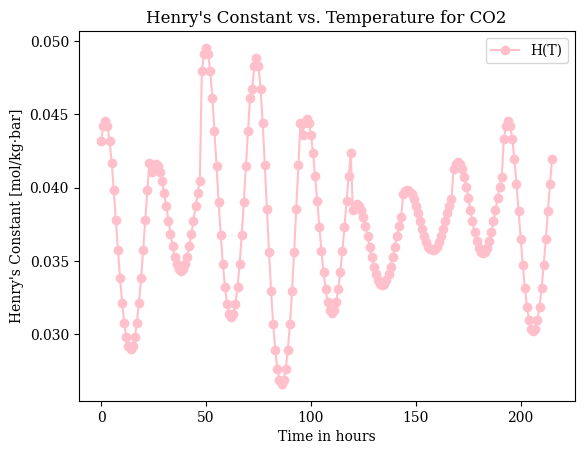

In [32]:
# GAS mass transfer: determine the henry coefficients
#temperature model based for the henry's constant
import math
import math
import numpy as np
def henry_constant_ht(T_c=Tvals,
                      H0=0.034,       # mol/kg·bar at T0
                      T0=298.0,       # K
                      deltaH=-19.57e3,# J/mol
                      R=8.314):       # J/(mol·K)
    """
    Computes Henry's constant as a function of temperature (in Celsius) using a
    van ’t Hoff expression. Returns a list of H(T) values.
    """
    # Convert from Celsius to Kelvin
    T_K = T_c + 273.15
    # Build up the H(T) values
    HT_array = []
    for temp in T_K:
        # Calculate ln(H)
        ln_H = math.log(H0) - (deltaH / R) * ((1.0 / temp) - (1.0 / T0))
        # Exponentiate to get H(T)
        HT_array.append(math.exp(ln_H))
    return HT_array
# Example usage
H_values = henry_constant_ht(Tvals)
plt.figure()
plt.plot(t_hr,H_values, 'o-', label='H(T)', color='pink')
plt.xlabel('Time in hours')
plt.ylabel('Henry\'s Constant [mol/kg·bar]')
plt.title('Henry\'s Constant vs. Temperature for CO2')
plt.legend()
plt.show()


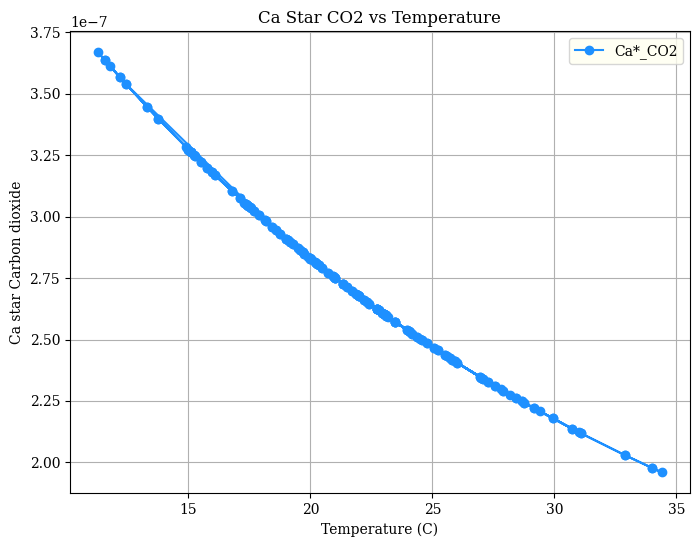

In [33]:
#correlation from other paper
import numpy as np
def henry_co2(Tvals):
    """
    Compute Henry's constant in MPa for CO₂ using empirical correlation.
    where T is in Kelvin.Returns Henry's constants in MPa at the input temperatures.
    """
    # Convert Celsius to Kelvin
    Tvals_k = Tvals + 273.15
    # Coefficients in the correlation
    A = -6.8346
    B = 1.2817e4
    C = -3.7668e6
    D = 2.997e8
    # Calculate ln(H / MPa) for each temperature
    ln_H = A + (B / Tvals_k) + (C / (Tvals_k**2)) + (D / (Tvals_k**3))
    # Exponentiate to get H
    return np.exp(ln_H)
# Example usage
if __name__ == "__main__":
    henry_values_co2 = henry_co2(Tvals)
    # Print the results- optional
    #for T, H in zip(Tvals, henry_values_co2):
        #print(f"T = {T:5.1f} °C -> H₂l = {H:.4f} MPa")
Pa_co2=4e-5
c_a_star_list = []
for H in henry_values_co2:
    c_a_star_co2 = Pa_co2 / H
    c_a_star_list.append(c_a_star_co2)
c_a_star_array = np.array(c_a_star_list)
plt.figure(figsize=(8, 6))
plt.plot(Tvals, c_a_star_array, marker='o', linestyle='-', color='dodgerblue', label="Ca*_CO2")
# Labels and title
plt.xlabel("Temperature (C)")
plt.ylabel("Ca star Carbon dioxide")
plt.title("Ca Star CO2 vs Temperature")
plt.legend(facecolor='ivory')
plt.grid(True)
# Show the plot
plt.show()



Henry’s constant for each temperature: [0.0015069736399195759, 0.001528062895016756, 0.0015353504104195354, 0.001528062895016756, 0.0015069736399195759, 0.0014742559115290186, 0.0014330918912220407, 0.0013871594908789401, 0.001340136916776629, 0.0012953284926754027, 0.0012554533448074774, 0.0012225828439033784, 0.0011981808143427856, 0.001183193170670579, 0.0011781419847915985, 0.001183193170670579, 0.0011981808143427856, 0.0012225828439033784, 0.0012554533448074774, 0.0012953284926754027, 0.001340136916776629, 0.0013871594908789401, 0.0014330918912220407, 0.0014742559115290186, 0.0014608483127465475, 0.0014697593128563894, 0.0014728161049035184, 0.0014697593128563894, 0.0014608483127465475, 0.0014468282590775316, 0.0014288385302378365, 0.001408282142610272, 0.0013866814215802348, 0.0013655434879749438, 0.0013462517987981085, 0.001329990484196804, 0.001317699773655466, 0.0013100553297750997, 0.0013074622540421737, 0.0013100553297750997, 0.001317699773655466, 0.001329990484196804, 0.001

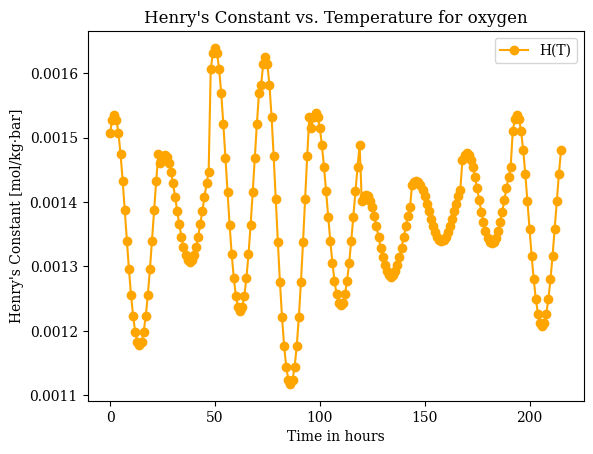

In [34]:
#temperature model based for the henry's constant for OXYGEN
import math
import math
import numpy as np
def henry_constant_oxygen(T_c=Tvals,
                      H0=0.0013,       # mol/kg·bar at T0
                      T0=298.0,       # K (reference temperature)
                      deltaH=-12.06e3,# J/mol
                      R=8.314):       # J/(mol·K)
    """
    Computes Henry's constant as a function of temperature (in Celsius) using a
    van ’t Hoff expression. Returns a list of H(T) values.
    """
    # Convert from Celsius to Kelvin
    T_K = T_c + 273.15
    # Build up the H(T) values
    HT_array_oxygen = []
    for temp in T_K:
        # Calculate ln(H)
        ln_H = math.log(H0) - (deltaH / R) * ((1.0 / temp) - (1.0 / T0))
        # Exponentiate to get H(T)
        HT_array_oxygen.append(math.exp(ln_H))
    return HT_array_oxygen
# Example usage
H_values_oxygen = henry_constant_oxygen(Tvals)
print("Henry’s constant for each temperature:", H_values_oxygen)
print(len(H_values_oxygen))
plt.figure()
plt.plot(t_hr,H_values_oxygen, 'o-', label='H(T)', color='orange')
plt.xlabel('Time in hours')
plt.ylabel('Henry\'s Constant [mol/kg·bar]')
plt.title('Henry\'s Constant vs. Temperature for oxygen')
plt.legend()
plt.show()
P_a_oxygen=2.02E04
C_A_star_array_oxygen = []
for H in H_values_oxygen:
    c_a_star_oxygen = P_a_oxygen / H
    C_A_star_array_oxygen.append(c_a_star_oxygen)



In [35]:
#oxygen henrys law profile (C star)
#from textbook this is the formula given
def calc_oxygen_solubility(Tvals):
    """
    Given an array of temperature values (Tvals) in degrees Celsius,
    return an array of oxygen solubilities (C*_AL in mg L^-1) using
    the formula:
        C*_AL = 14.161 - 0.3943*T + 0.007714*T^2 - 0.0000646*T^3
        Array of oxygen solubilities corresponding to each temperature in Tvals.
    """
    Tvals = np.asarray(Tvals)  # Ensure Tvals is a NumPy array
    Cstar_vals = (14.161
                  - 0.3943 * Tvals
                  + 0.007714 * Tvals**2
                  - 0.0000646 * Tvals**3)
    return Cstar_vals

solubilities_oxygen = calc_oxygen_solubility(Tvals) #oxyge
#units are in mg/L convert to g/L
solubilities_oxygen_gL=solubilities_oxygen/1000


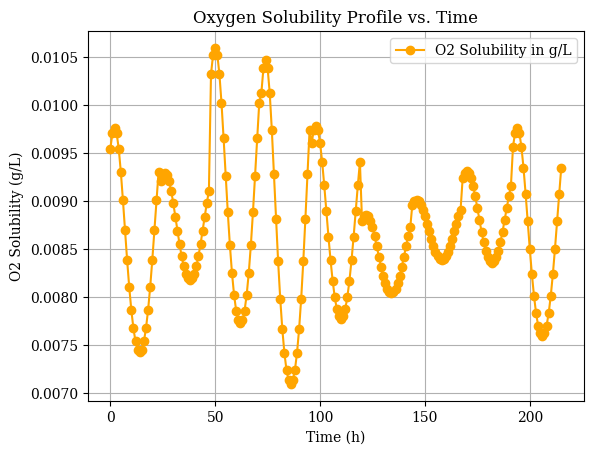

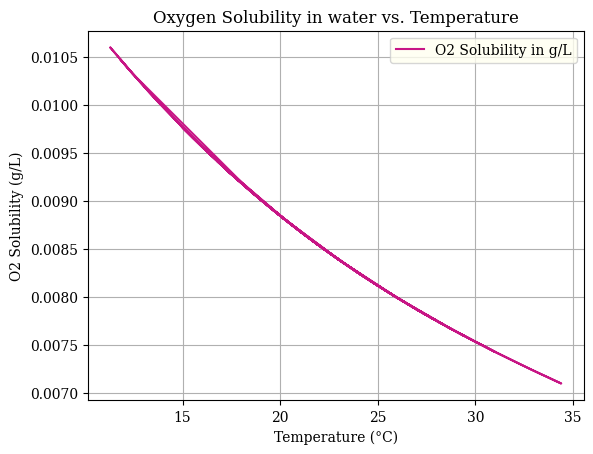

In [36]:
plt.figure()
plt.plot(t_hr, solubilities_oxygen_gL, label='O2 Solubility in g/L', marker='o', linestyle='-', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('O2 Solubility (g/L)')
plt.title('Oxygen Solubility Profile vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, you can also plot solubility vs. temperature directly:
plt.figure()
plt.plot(Tvals, solubilities_oxygen_gL, label='O2 Solubility in g/L', color='mediumvioletred')
plt.xlabel('Temperature (°C)')
plt.ylabel('O2 Solubility (g/L)')
plt.title('Oxygen Solubility in water vs. Temperature')
plt.legend(facecolor='ivory')
plt.grid(True)
plt.show()

November


<ipython-input-42-53ef53410610>:127: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(


 Time |   X   |   S   |   N   | CO2(aq) | HCO3-  |  CO3   |  O2   |   [H+]   |  pH
  1.0 |  0.249 |  2.000 |  0.249 |  0.0003 |  0.0008 | 0.0011 | 0.010 | 6.28e-06 |  5.20
  2.0 |  0.249 |  2.000 |  0.249 |  0.0000 |  0.0004 | 0.0013 | 0.010 | 2.71e-06 |  5.57
  3.0 |  0.248 |  2.000 |  0.249 |  0.0000 |  0.0003 | 0.0014 | 0.010 | 1.78e-06 |  5.75
  4.0 |  0.248 |  2.000 |  0.249 |  0.0000 |  0.0002 | 0.0014 | 0.010 | 1.34e-06 |  5.87
  5.0 |  0.247 |  2.000 |  0.249 |  0.0000 |  0.0002 | 0.0014 | 0.010 | 1.07e-06 |  5.97
  6.0 |  0.247 |  2.000 |  0.249 |  0.0000 |  0.0001 | 0.0014 | 0.009 | 8.98e-07 |  6.05
  7.0 |  0.250 |  1.992 |  0.249 |  0.0000 |  0.0001 | 0.0014 | 0.009 | 7.73e-07 |  6.11
  8.0 |  0.256 |  1.977 |  0.248 |  0.0000 |  0.0001 | 0.0014 | 0.009 | 6.79e-07 |  6.17
  9.0 |  0.265 |  1.955 |  0.247 |  0.0000 |  0.0001 | 0.0015 | 0.008 | 6.05e-07 |  6.22
 10.0 |  0.276 |  1.930 |  0.246 |  0.0000 |  0.0001 | 0.0015 | 0.008 | 5.47e-07 |  6.26
 11.0 |  0.289 |  1.901 |  

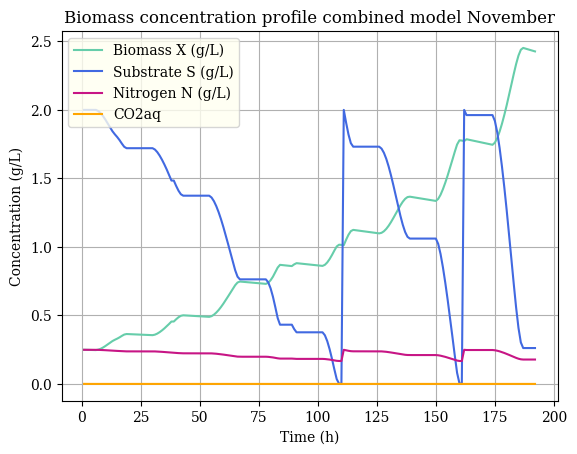

In [42]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
print(start_month)

mu_max  = 0.02833  # 1/h max growth rate
Kn=  1.4e-5 #g/L half-sat for nitrogen from Yang paper
Ks= 0.024    #g/L half-sat for substrate
Ko2= 0.40064 # g/L half-sat for oxygen
Yxs = 0.449    #gX / gS
Yxo2 = 0.0496   # gO2 / gX
kd= 0.0020833  # 1/h cell decay
YxN = 1/0.091
#CO2 uptake
Yco2x = 0.487    # gX / gCO2
Q_co2_max =7.94e-3  # g/h
K_Ca=0.0002   # half-sat for CO2 uptake
# Carbonic constants : f is forwards b is backwards
kf_c1=0.039
kb_c1=8.7e4
kf_c2 = 8.9e4
kb_c2 = 1.0e10
# Mass transfer: from averaged values in the reactor
kLa_CO2 = 9.0   #1/h
kLa_O2  = 15.0  #1/h
CO2_star_array= c_a_star_array
O2_star_array=solubilities_oxygen_gL
def pH_inhibition_factor(Hplus):
    import math
    slope  = 2.0
    pH_opt = 7.0
    if Hplus <= 1e-14:
        pH = 14.0
    else:
        pH = -np.log10(Hplus)
    return 1.0 / (1.0 + math.exp(-slope*(pH - pH_opt)))
def specific_growth_rate(S, N, O2, Hplus,
                         arrhenius_scalar,
                         fi_scalar
                         ):
    """
    Returns mu at a given time, using multi-substrate approach (S & N),
    plus time-dependent scaling factors (arrhenius_scalar, fi_scalar).
    """
    mu_s = S / (Ks + S)
    mu_n = N / (Kn + N)
    mu_o = O2 / (Ko2 + O2)
    mu = mu_max * mu_s * mu_n * arrhenius_scalar * fi_scalar
    return mu
# ODE system: y = [X, S, N, CO2aq, HCO3, CO3, O2, Hplus]
def big_odes(y, t,kLa_CO2, CO2eq,kf_c1, kb_c1, kf_c2, kb_c2,kLa_O2, O2eq,
             Q_co2_max, K_Ca, kd,
             effective_arrhenius_array,
             fI_values            ):
    """
    Returns dy/dt for:
      y = [X, S, N, CO2aq, HCO3, CO3, O2, H+].
    """
    X, S, N, CO2aq, HCO3, CO3, O2, Hplus = y
    hour_idx = int(np.floor(t))
    if hour_idx >= len(effective_arrhenius_array):
        hour_idx = len(effective_arrhenius_array) - 1
    #extract scalar value: match the time step to the value
    arrhenius_factor = effective_arrhenius_array[hour_idx]
    fi_factor  = fI_values[hour_idx]
    # Compute mu
    mu=specific_growth_rate(S, N, O2, Hplus, arrhenius_factor, fi_factor)
    #Biomass with decay
    dXdt = mu*X - kd*X
    # Substrate consumption
    dSdt=-(1.0 / Yxs)*mu*X
    # Nitrogen consumption
    dNdt=-(1.0 / YxN)*mu* X
    # CO2 uptake
    uptake_co2 = Yco2x * Q_co2_max * (CO2aq/(K_Ca+CO2aq)) * X
    # Reaction 1: CO2 + H2O <-> H+ + HCO3-
    r1_f = kf_c1 * CO2aq
    r1_b = kb_c1 * HCO3 * Hplus
    r1   = r1_f - r1_b
    # Reaction 2: HCO3- <-> H+ + CO3(2-)
    r2_f = kf_c2 * HCO3
    r2_b = kb_c2 * CO3 * Hplus
    r2   = r2_f - r2_b
    # CO2(aq)
    dCO2dt  = kLa_CO2*(CO2eq - CO2aq) - uptake_co2 - r1
    # HCO3-
    dHCO3dt = r1 - r2
    # CO3(2-)
    dCO3dt  = r2
    # O2 mass balance
    o2_consumption = Yxo2 * mu * X
    dO2dt = kLa_O2*(O2eq - O2) - o2_consumption
    # H+ balance
    dHplusdt = r1 + r2
    return [dXdt, dSdt, dNdt, dCO2dt, dHCO3dt, dCO3dt, dO2dt, dHplusdt]

# ---------------------------------------------------------------------
# Simulation function with feeding
# ---------------------------------------------------------------------
def simulate_with_feed( X0, S0, N0,CO2aq0, HCO3_0, CO3_0, O2_0, Hplus0,CO2_star_array, O2_star_array,effective_arrhenius_array,
    fI_values,  t_final=192, dt=1.0, feed_threshold=1e-3):
    """
    Integrates y = [X, S, N, CO2aq, HCO3, CO3, O2, Hplus] from t=0..t_final
    in discrete time steps. After each time-step, if S < feed_threshold,
    feed by resetting S,S0 and N,N0 to original values.
    """
    t_eval = np.arange(0, t_final + dt, dt)

    # 8 initial states
    y0 = [X0, S0, N0, CO2aq0, HCO3_0, CO3_0, O2_0, Hplus0]
    current_state = np.array(y0, dtype=float)
    results = []

    for i in range(len(t_eval) - 1):
        t0 = t_eval[i]
        t1 = t_eval[i+1]

        # Get the correct equilibrium CO2 and O2 from arrays at hour index
        hr = int(np.floor(t0))
        if hr >= len(CO2_star_array):
            hr = len(CO2_star_array) - 1
        CO2eq = CO2_star_array[hr]
        O2eq  = O2_star_array[hr]

        # Integrate from t0 to t1
        local_t = np.linspace(t0, t1, 2)
        sol = odeint(
            big_odes,
            current_state,
            local_t,
            args=(
                kLa_CO2, CO2eq,
                kf_c1, kb_c1, kf_c2, kb_c2,
                kLa_O2, O2eq,
                Q_co2_max, K_Ca,
                kd,
                effective_arrhenius_array,
                fI_values
            )
        )

        final_state = sol[-1]
        X_end, S_end, N_end, CO2aq_end, HCO3_end, CO3_end, O2_end, Hplus_end = final_state

        if X_end < 0:      X_end = 0.0
        if S_end < 0:      S_end = 0.0
        if N_end < 0:      N_end = 0.0
        if CO2aq_end < 0:  CO2aq_end = 0.0
        if HCO3_end < 0:   HCO3_end = 0.0
        if CO3_end < 0:    CO3_end = 0.0
        if O2_end < 0:     O2_end = 0.0
        if Hplus_end < 1e-14:
            Hplus_end = 1e-14

        # Feed if S < feed_threshold
        if S_end < feed_threshold:
            S_end = S0
            N_end = N0
        time_now = t1
        results.append([
            time_now,
            X_end, S_end, N_end,
            CO2aq_end, HCO3_end, CO3_end,
            O2_end, Hplus_end
        ])
        current_state = np.array([
            X_end, S_end, N_end,
            CO2aq_end, HCO3_end, CO3_end,
            O2_end, Hplus_end
        ])
    # Convert to NumPy array
    results = np.array(results)

    t_out      = results[:, 0]
    X_out      = results[:, 1]
    S_out      = results[:, 2]
    N_out      = results[:, 3]
    CO2aq_out  = results[:, 4]
    HCO3_out   = results[:, 5]
    CO3_out    = results[:, 6]
    O2_out     = results[:, 7]
    Hplus_out  = results[:, 8]

    pH_out = -np.log10(Hplus_out + 1e-20)
    return (t_out, X_out, S_out, N_out,
            CO2aq_out, HCO3_out, CO3_out,
            O2_out, Hplus_out, pH_out)

hours = 192

# Initial conditions
X0      = 0.25    # g/L biomass
S0      = 2.0     # g/L substrate
N0      = 0.249   # g/L nitrogen
CO2aq0  = 3   # g/L
HCO3_0  = 0.001   # g/L
CO3_0   = 0.001   # g/L
O2_0    = 0.0065  # g/L
Hplus0  = 1e-7    # M => pH ~7
t_final = 192
dt      = 1.0

# Run the simulation
(t, X, S, N,CO2aq, HCO3_vals, CO3_vals,O2_vals, Hplus_vals, pH_vals) = simulate_with_feed(
    X0, S0, N0,CO2aq0, HCO3_0, CO3_0,O2_0, Hplus0,CO2_star_array, O2_star_array,effective_arrhenius_array, fI_values, t_final=t_final, dt=dt,
    feed_threshold=0.000001)

print(" Time |   X   |   S   |   N   | CO2(aq) | HCO3-  |  CO3   |  O2   |   [H+]   |  pH")
for i in range(len(t)):
    print(f"{t[i]:5.1f} | {X[i]:6.3f} | {S[i]:6.3f} | {N[i]:6.3f} | "
          f"{CO2aq[i]:7.4f} | {HCO3_vals[i]:7.4f} | {CO3_vals[i]:6.4f} | "
          f"{O2_vals[i]:5.3f} | {Hplus_vals[i]:8.2e} | {pH_vals[i]:5.2f}")
plt.figure()
plt.plot(t, X, label='Biomass X (g/L)' , color='mediumaquamarine')
plt.plot(t, S, label='Substrate S (g/L)', color='royalblue')
plt.plot(t, N, label='Nitrogen N (g/L)', color='mediumvioletred')
plt.plot(t,CO2aq, label='CO2aq', color='orange')
#plt.plot(t,O2_vals, label='O2 (g/L)', color='forestgreen')
plt.xlabel('Time (h)')
plt.ylabel('Concentration (g/L)')
plt.title("Biomass concentration profile combined model "
f"{start_month}"
)
plt.grid(True)
plt.legend(facecolor='ivory', loc='upper left')
plt.show()


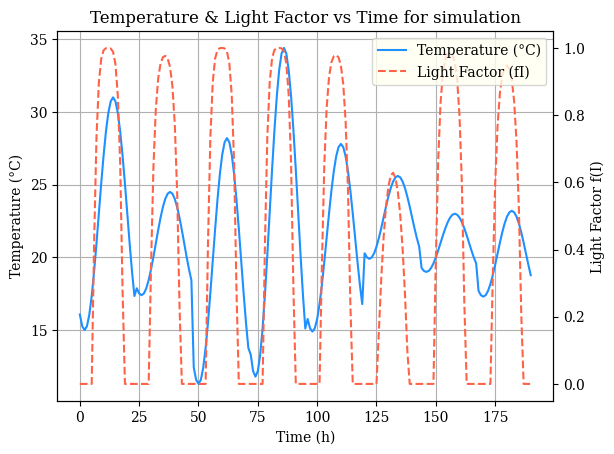

In [44]:
import numpy as np
import matplotlib.pyplot as plt


temperature_array=Tvals[0:191]
fI_array=fI_values[0:191]
t_array=t_hr[0:191]
fig, ax1 = plt.subplots()
# Plot temperature vs time on the main (left) y-axis
ax1.plot(t_array, temperature_array, color='dodgerblue', label='Temperature (°C)', )
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Temperature (°C)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# Create a twin axis that shares the same x-axis (for time),
ax2 = ax1.twinx()

# Plot fI vs time on the secondary (right) y-axis
color2 = 'tomato'
ax2.plot(t_array, fI_array, color=color2, linestyle='--', label='Light Factor (fI)')
ax2.set_ylabel('Light Factor f(I)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', facecolor='ivory')

plt.title('Temperature & Light Factor vs Time for simulation')
plt.show()


References
Bello, M., Ranganathan, P. and Brennan, F. (2017). Dynamic modelling of microalgae cultivation process in high rate algal wastewater pond. Algal Research, 24, pp.457–466. doi:https://doi.org/10.1016/j.algal.2016.10.016.

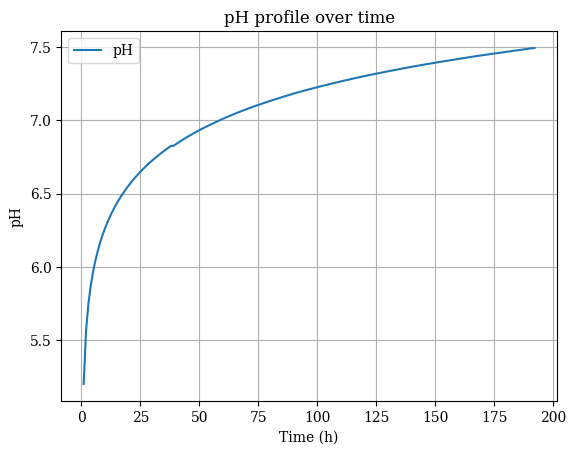

In [45]:


# Second figure: pH vs. time
plt.figure()
plt.plot(t, pH_vals, label='pH')
plt.xlabel('Time (h)')
plt.ylabel('pH')
plt.title('pH profile over time')
plt.grid(True)
plt.legend()
plt.show()

#ph change

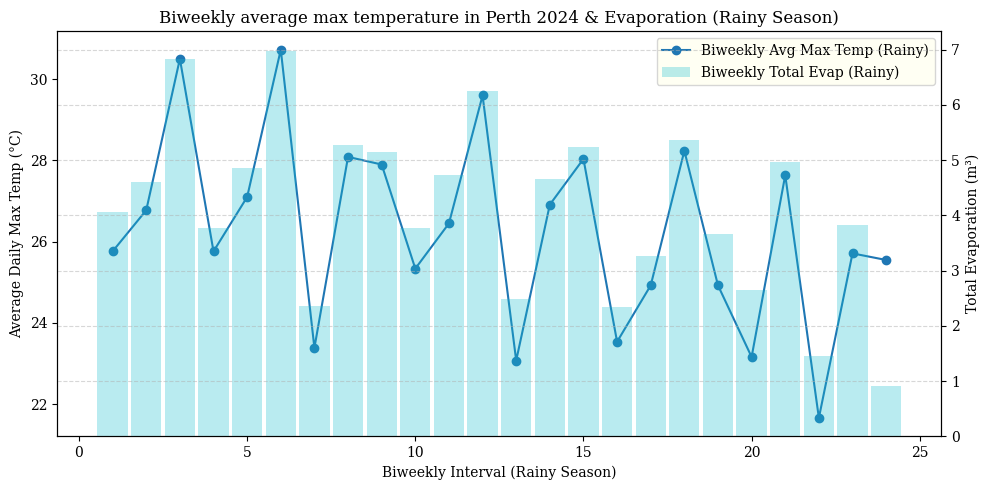

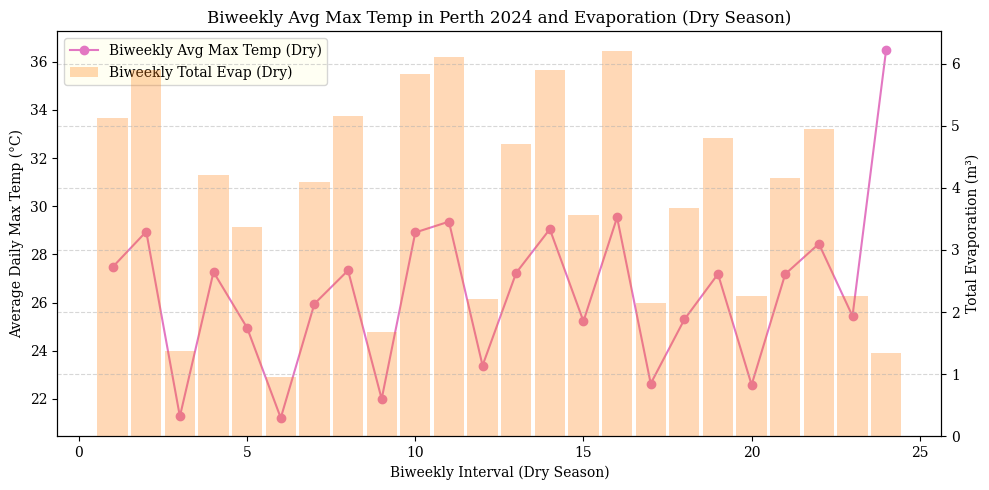

In [46]:

#the following model is an estaimte which uses temperature to calculate water evaporation losses
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

temp_data = np.array([
    [27.9, 42.6, 33.8, 27.6, 24.9, 25.8, 20.3, 16.9, 19.2, 29.7, 29.5, 23.9],
    [28.4, 40.4, 31.0, 29.5, 25.9, 20.3, 18.1, 17.3, 25.9, 18.0, 23.0, 21.7],
    [31.6, 32.5, 34.6, 29.8, 21.6, 21.5, np.nan, 19.3, 21.7, 18.1, 22.4, 23.2],
    [31.1, 25.5, 27.0, 30.6, 22.2, 21.5, 17.9, 20.2, 20.7, 20.5, 21.9, 24.8],
    [30.9, 28.1, 32.3, 33.6, 21.0, 23.8, 17.2, 20.7, 15.3, 22.6, 22.2, 25.5],
    [33.4, 32.3, 32.9, 34.5, 22.1, 25.0, 16.9, 21.1, 18.5, 23.5, 20.8, 28.1],
    [36.0, 36.1, 36.0, 36.5, 26.8, 20.2, 19.9, 19.8, 19.9, 25.3, 21.6, 34.9],
    [36.5, 39.9, 27.6, 29.2, 26.8, 20.4, 20.7, 20.4, 20.2, 21.8, 23.4, 33.4],
    [30.6, 42.0, 26.1, 27.4, 27.5, 20.4, 21.5, 22.4, 21.3, 23.9, 23.2, 35.0],
    [30.6, 42.3, 28.0, 28.1, 27.7, 20.1, 18.1, 26.2, 22.2, 28.0, 24.2, 35.3],
    [31.8, 37.5, 31.3, 28.5, 25.8, 17.9, 18.4, 21.5, 25.1, 31.4, 25.6, 40.4],
    [37.0, 34.1, 30.7, 26.4, 27.1, 20.8, 17.6, 20.5, 26.9, 22.2, 24.1, 37.5],
    [40.7, 34.4, 31.5, 26.7, 28.8, 20.6, 19.8, 20.9, 28.4, 25.4, 31.8, 30.4],
    [36.6, 36.5, 29.4, 26.6, 29.4, 21.2, 17.7, 19.4, 26.2, 22.5, 31.0, 29.0],
    [34.4, 41.7, 32.2, 28.8, 28.1, 22.7, 22.2, 18.0, 24.3, 21.9, 24.5, 25.4],
    [38.3, 27.5, 33.5, 30.8, 28.7, 22.0, 22.8, 21.1, 24.0, 21.9, 22.4, 24.8],
    [31.2, 37.4, 28.9, 32.6, 28.0, 20.5, 23.5, 16.4, 28.3, 21.3, 28.2, 36.5],
    [26.8, 42.9, 27.7, 33.2, 27.6, 19.1, 16.6, 17.7, 24.1, 22.7, 34.4, 29.0],
    [27.6, 42.3, 26.7, 30.0, 26.7, 18.5, 18.2, 17.3, 22.3, 24.3, 27.8, 29.5],
    [34.0, 38.1, 29.1, 31.0, 24.9, 19.0, 20.1, 19.1, 21.3, 22.6, 25.6, 35.2],
    [30.3, 28.2, 30.0, 31.1, 26.7, 20.5, 20.2, 20.4, 19.8, 19.7, 23.0, 38.0],
    [28.0, 32.2, 28.7, 23.3, 25.8, 19.2, 20.6, 21.6, 24.6, 21.2, 23.2, 41.2],
    [27.7, 37.7, 27.9, 22.4, 26.6, 18.1, 16.3, 20.0, 22.5, 23.1, 29.4, 43.4],
    [28.2, 25.4, 28.7, 23.5, 26.8, 17.8, 16.0, 18.9, 21.7, 29.6, 36.7, 28.4],
    [28.5, 24.1, 29.3, 22.8, 24.0, 17.0, 18.5, 20.6, 23.3, 23.5, 23.5, 22.9],
    [29.8, 32.3, 31.7, 27.4, 25.2, 19.4, 19.3, 20.6, 28.6, 22.5, 23.3, 23.4],
    [34.0, 26.5, 34.3, 23.6, 21.9, 17.4, 20.4, 19.8, 17.5, 26.2, 28.2, 25.0],
    [27.1, 30.3, 28.8, 25.7, 17.4, 19.9, 20.4, 21.4, 18.5, 31.8, 32.1, 31.7],
    [28.1, 33.5, 26.9, 25.8, 15.4, 18.4, 19.9, 19.3, 20.9, 34.1, 31.6, 35.1],
    [36.0, np.nan, 28.5, 20.0, 19.8, 19.3, 21.4, 18.4, 24.3, 29.9, 29.8, 33.4],
    [41.9, np.nan, 29.8, np.nan, 21.6, np.nan, 23.1, 19.4, np.nan, 33.3, np.nan, 36.5]
], dtype=float)

# Get dimensions of the data
days_per_month = temp_data.shape[0]  # 31 days
months = temp_data.shape[1]  # 12 months

# Reshape the data: We'll create a flattened array of daily temperatures
# Note: This handles the case where not all months have 31 days by keeping NaN values
daily_temps = temp_data.flatten()
n_days = len(daily_temps)  # Will be 31*12 = 372 days (some will be NaN for shorter months)
# 2) Compute daily maximum temperature
# We'll just use the flattened data
daily_max_temp = daily_temps
# 3) Compute evaporation volume from daily max
def evap_volume(temp_c):
    """
    For each degree above 20°C => 0.122 mm/day of evaporation.
    Convert from mm to m, then multiply by 1000 m² => m³/day.
    """
    if np.isnan(temp_c):
        return 0.0  # Handle NaN values

    alpha = 0.122  # mm/day/°C above 20, taken from Nevermann.
    evap_mm = alpha * max(temp_c - 20, 0.0)
    evap_m = evap_mm / 1000.0
    surface_area = 667 #this is each photobioreactor surface area
    return evap_m * surface_area
# Compute daily volumes
volume_losses = np.array([evap_volume(t) for t in daily_max_temp])
# 4) Biweekly Aggregation (2-week blocks)
#####################################################
def biweekly_aggregation(daily_temps, daily_evaps, chunk_size=14):
    """
    Splits the daily arrays (daily_temps, daily_evaps) into fixed-size chunks (e.g., 14 days).
    Returns two new lists:
      - biweekly_avg_temp: average daily max temp over each chunk
      - biweekly_sum_evap: total evaporation over each chunk
    """
    n_days = len(daily_temps)
    biweekly_avg_temp = []
    biweekly_sum_evap = []

    # Step through in increments of 'chunk_size' days
    for start_day in range(0, n_days, chunk_size):
        end_day = min(start_day + chunk_size, n_days)  # Ensure we don't go out of bounds
        temps_chunk = daily_temps[start_day:end_day]
        evaps_chunk = daily_evaps[start_day:end_day]

        # Filter out NaN values before calculating metrics
        valid_temps = temps_chunk[~np.isnan(temps_chunk)]
        if len(valid_temps) > 0:  # Only calculate if we have valid data
            # Average for temperatures, sum for evaporation
            avg_temp = np.mean(valid_temps)  # average daily max
            sum_evap = np.sum(evaps_chunk)   # total evaporation in that chunk

            biweekly_avg_temp.append(avg_temp)
            biweekly_sum_evap.append(sum_evap)

    return biweekly_avg_temp, biweekly_sum_evap


# 5) Define Rainy Season vs. Dry Season by month

# For Perth, Australia:
# Rainy season is typically May through October (month indices 4-9)
# Dry season is November through April (month indices 10-11, 0-3)

# Create masks for the months that belong to each season
rainy_months = [4, 5, 6, 7, 8, 9]  # May-October (0-indexed)
dry_months = [0, 1, 2, 3, 10, 11]  # Jan-Apr and Nov-Dec (0-indexed)

# Extract the data for each season
rainy_indices = []
dry_indices = []

for month in range(months):
    start_idx = month * days_per_month
    end_idx = start_idx + days_per_month

    if month in rainy_months:
        rainy_indices.extend(range(start_idx, end_idx))
    elif month in dry_months:
        dry_indices.extend(range(start_idx, end_idx))

rainy_max_temp = daily_max_temp[rainy_indices]
rainy_evap = volume_losses[rainy_indices]
dry_max_temp = daily_max_temp[dry_indices]
dry_evap = volume_losses[dry_indices]

chunk_size = 8  # 4-week blocks
rainy_avg_temp, rainy_sum_evap = biweekly_aggregation(rainy_max_temp, rainy_evap, chunk_size)
dry_avg_temp, dry_sum_evap = biweekly_aggregation(dry_max_temp, dry_evap, chunk_size)
fig1, ax1 = plt.subplots(figsize=(10, 5))

biweekly_rainy_x = np.arange(1, len(rainy_avg_temp) + 1)
color_temp = 'tab:blue'
ax1.set_xlabel('Biweekly Interval (Rainy Season)')
ax1.set_ylabel('Average Daily Max Temp (°C)', color='black')
line_rainy = ax1.plot(
    biweekly_rainy_x, rainy_avg_temp,
    color=color_temp, marker='o', label='Biweekly Avg Max Temp (Rainy)'
)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
color_evap = 'tab:cyan'
ax2.set_ylabel('Total Evaporation (m³)', color='black')
bars_rainy = ax2.bar(
    biweekly_rainy_x, rainy_sum_evap,
    alpha=0.3, color=color_evap, width=0.9, label='Biweekly Total Evap (Rainy)'
)
ax2.tick_params(axis='y', labelcolor='black')

# Legend
lns = line_rainy + [bars_rainy]
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best', facecolor='ivory')

plt.title('Biweekly average max temperature in Perth 2024 & Evaporation (Rainy Season)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

fig2, ax1 = plt.subplots(figsize=(10, 5))
biweekly_dry_x = np.arange(1, len(dry_avg_temp) + 1)
color_temp = 'tab:pink'
ax1.set_xlabel('Biweekly Interval (Dry Season)')
ax1.set_ylabel('Average Daily Max Temp (°C)', color='black')
line_dry = ax1.plot(
    biweekly_dry_x, dry_avg_temp,
    color=color_temp, marker='o', label='Biweekly Avg Max Temp (Dry)'
)
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()
color_evap = 'tab:orange'
ax2.set_ylabel('Total Evaporation (m³)', color='black')
bars_dry = ax2.bar(
    biweekly_dry_x, dry_sum_evap,
    alpha=0.3, color=color_evap, width=0.9, label='Biweekly Total Evap (Dry)'
)
ax2.tick_params(axis='y', labelcolor='black')
lns = line_dry + [bars_dry]
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best',facecolor='ivory')
plt.title('Biweekly Avg Max Temp in Perth 2024 and Evaporation (Dry Season)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Nevermann, H., Aminzadeh, M., Madani, K. and Shokri, N. (2024). Quantifying water evaporation from large reservoirs: Implications for water management in water-stressed regions. Environmental Research, 262, p.119860. doi:https://doi.org/10.1016/j.envres.2024.119860.

In [47]:
import pandas as pd

#SENSITIVITY ANALYSIS : discrete fractions

biomass_data = [
    69.322,  # Jan
    8.627,   # Feb
    77.320,  # Mar
    43.119,  # Apr
    41.198,  # May
    9.721,   # Jun
    8.382,   # Jul
    20.624,  # Aug
    72.872,  # Sep
    61.816,  # Oct
    85.335,  # Nov
    37.035   # Dec
]

X_annual_no_contam = sum(biomass_data)
fractions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
n_reactors = 16
volume_per_reactor_m3 = 200
total_volume_L = n_reactors * volume_per_reactor_m3 * 1000
days_simulated = 365
days_operational = 300
scale_days = days_operational / days_simulated  # ~0.82
results = []
for f in fractions:
    # (1) Bacterial fraction reduces algae by (1 - f)
    X_annual_f = (1 - f) * X_annual_no_contam

    # (2) Tonnes for 365 days
    tonnes_365 = (X_annual_f * total_volume_L) / 1e6

    # (3) Tonnes for 300 operational days
    tonnes_300 = tonnes_365 * scale_days

    results.append({
        'Fraction f': f,
        'Annual Biomass (g/L)': X_annual_f,
        'Total Tonnes (365 d)': tonnes_365,
        'Total Tonnes (300 d)': tonnes_300
    })

df_results = pd.DataFrame(results)
print(df_results)


   Fraction f  Annual Biomass (g/L)  Total Tonnes (365 d)  \
0         0.0              535.3710            1713.18720   
1         0.1              481.8339            1541.86848   
2         0.2              428.2968            1370.54976   
3         0.3              374.7597            1199.23104   
4         0.4              321.2226            1027.91232   
5         0.5              267.6855             856.59360   

   Total Tonnes (300 d)  
0           1408.099068  
1           1267.289162  
2           1126.479255  
3            985.669348  
4            844.859441  
5            704.049534  


Monte Carlo runs: 100000
Mean annual yield (300 days): 1138.5 tonnes
Median yield: 1132.6 tonnes
10th percentile: 1048.4,  90th percentile: 1237.4
Min: 985.7,  Max: 1400.8
Probability of meeting 1181.0 tonnes: 27.0%


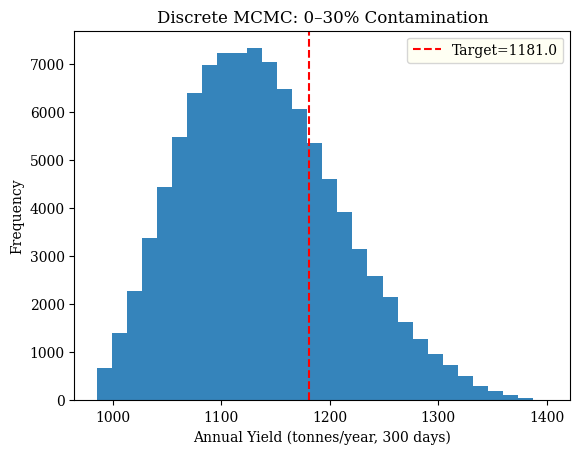

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Discrete contamination fractions up to 30%
contamination_set = np.array([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
n_states = len(contamination_set)

# 2) Transition matrix (7×7). Rows sum to 1.0
#    P[i, j] = probability of going from fraction i to fraction j next month
P = np.array([
    # from 0%:
    [0.40, 0.25, 0.15, 0.10, 0.05, 0.03, 0.02],
    # from 5%:
    [0.10, 0.40, 0.20, 0.15, 0.10, 0.03, 0.02],
    # from 10%:
    [0.05, 0.10, 0.40, 0.20, 0.15, 0.06, 0.04],
    # from 15%:
    [0.02, 0.05, 0.10, 0.40, 0.25, 0.10, 0.08],
    # from 20%:
    [0.01, 0.02, 0.05, 0.15, 0.40, 0.25, 0.12],
    # from 25%:
    [0.00, 0.02, 0.03, 0.10, 0.20, 0.40, 0.25],
    # from 30%:
    [0.00, 0.00, 0.02, 0.05, 0.10, 0.20, 0.63],
])

for i, row in enumerate(P):
    row_sum = row.sum()
    if not np.isclose(row_sum, 1.0, atol=1e-8):
        print(f"Warning: row {i} sums to {row_sum:.3f} (should be 1.0)")

#Ideal monthly yields (no contamination), from your table
#    (in g/L for each of the 12 months)
X_ideal = np.array([
    69.322,  # Jan
    8.627,   # Feb
    77.320,  # Mar
    43.119,  # Apr
    41.198,  # May
    9.721,   # Jun
    8.382,   # Jul
    20.624,  # Aug
    72.872,  # Sep
    61.816,  # Oct
    85.335,  # Nov
    37.035   # Dec
])

#Reactor setup & day scaling
n_reactors = 16
vol_per_reactor_m3 = 200
total_volume_L = n_reactors * vol_per_reactor_m3 * 1000  # 3.2 million L

days_full = 365
days_operational = 300
day_scale_factor = days_operational / days_full  # ~0.82

production_target = 1181.0  # e.g. the required annual (300-day) target

# 5) Monte Carlo simulation of 12-month Markov chain
N = 100_000
annual_yields = np.zeros(N)

# Initial distribution: uniform chance of starting in each fraction state
init_probs = np.full(n_states, 1.0 / n_states)

for i in range(N):
    # Pick initial contamination state
    current_state_idx = np.random.choice(n_states, p=init_probs)

    # Accumulate yield over 12 months
    sum_gL = 0.0
    for m in range(12):
        frac_m = contamination_set[current_state_idx]  # contamination fraction
        # actual monthly yield:
        sum_gL += (1.0 - frac_m) * X_ideal[m]

        # Next month's state
        next_state_idx = np.random.choice(n_states, p=P[current_state_idx])
        current_state_idx = next_state_idx

    # Convert g/L -> total grams -> tonnes -> scale from 365 to 300 days
    total_g_365 = sum_gL * total_volume_L
    total_tonnes_365 = total_g_365 / 1e6
    total_tonnes_300 = total_tonnes_365 * day_scale_factor

    annual_yields[i] = total_tonnes_300


mean_yield = np.mean(annual_yields)
median_yield = np.median(annual_yields)
p10 = np.percentile(annual_yields, 10)
p90 = np.percentile(annual_yields, 90)
min_val = np.min(annual_yields)
max_val = np.max(annual_yields)
prob_meet_target = np.mean(annual_yields >= production_target)*100
print(f"Monte Carlo runs: {N}")
print(f"Mean annual yield (300 days): {mean_yield:.1f} tonnes")
print(f"Median yield: {median_yield:.1f} tonnes")
print(f"10th percentile: {p10:.1f},  90th percentile: {p90:.1f}")
print(f"Min: {min_val:.1f},  Max: {max_val:.1f}")
print(f"Probability of meeting {production_target} tonnes: {prob_meet_target:.1f}%")

#Plot distribution
plt.hist(annual_yields, bins=30, alpha=0.9)
plt.axvline(production_target, linestyle='--', color='red', label=f"Target={production_target}")
plt.xlabel("Annual Yield (tonnes/year, 300 days)")
plt.ylabel("Frequency")
plt.title("Discrete MCMC: 0–30% Contamination")
plt.legend(facecolor='ivory')
plt.show()

Monte Carlo runs: 100000
Mean annual yield (300 days): 1224.0 tonnes
Median yield: 1219.4 tonnes
10th percentile: 1164.9,  90th percentile: 1289.7
Min: 1126.5,  Max: 1408.1
Probability of meeting 1181.0 tonnes: 79.9%


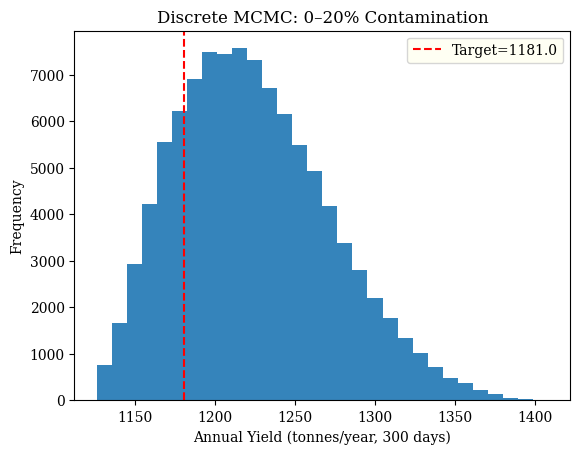

In [49]:
import numpy as np
import matplotlib.pyplot as plt

contamination_set = np.array([0.00, 0.05, 0.10, 0.15, 0.20])
n_states = len(contamination_set)

# transition matrix (5×5)
P = np.array([
    [0.42105263, 0.26315789, 0.15789474, 0.10526316, 0.05263158],  # from 0%
    [0.10526316, 0.42105263, 0.21052632, 0.15789474, 0.10526316],  # from 5%
    [0.05555556, 0.11111111, 0.44444444, 0.22222222, 0.16666667],  # from 10%
    [0.02439024, 0.06097561, 0.12195122, 0.48780488, 0.30487805],  # from 15%
    [0.01587302, 0.03174603, 0.07936508, 0.23809524, 0.63492063],  # from 20%
])

for i, row in enumerate(P):
    row_sum = row.sum()
    if not np.isclose(row_sum, 1.0, atol=1e-8):
        print(f"Warning: row {i} sums to {row_sum:.3f} (should be 1.0)")

X_ideal = np.array([
    69.322,  # Jan
    8.627,   # Feb
    77.320,  # Mar
    43.119,  # Apr
    41.198,  # May
    9.721,   # Jun
    8.382,   # Jul
    20.624,  # Aug
    72.872,  # Sep
    61.816,  # Oct
    85.335,  # Nov
    37.035   # Dec
])


n_reactors = 16
vol_per_reactor_m3 = 200
total_volume_L = n_reactors * vol_per_reactor_m3 * 1000

days_full = 365
days_operational = 300
day_scale_factor = days_operational / days_full  # ~0.82
production_target = 1181.0
N = 100000
annual_yields = np.zeros(N)
init_probs = np.full(n_states, 1.0 / n_states)
for i in range(N):
    #initial contamination state
    current_state_idx = np.random.choice(n_states, p=init_probs)

    #yield over 12 months
    sum_gL = 0.0
    for m in range(12):
        frac_m = contamination_set[current_state_idx]  # contamination fraction
        # actual monthly yield:
        sum_gL += (1.0 - frac_m) * X_ideal[m]

        # Next month's state
        current_state_idx = np.random.choice(n_states, p=P[current_state_idx])


    total_g_365 = sum_gL * total_volume_L
    total_tonnes_365 = total_g_365 / 1e6
    total_tonnes_300 = total_tonnes_365 * day_scale_factor

    annual_yields[i] = total_tonnes_300

mean_yield = np.mean(annual_yields)
median_yield = np.median(annual_yields)
p10 = np.percentile(annual_yields, 10)
p90 = np.percentile(annual_yields, 90)
min_val = np.min(annual_yields)
max_val = np.max(annual_yields)

prob_meet_target = np.mean(annual_yields >= production_target)*100

print(f"Monte Carlo runs: {N}")
print(f"Mean annual yield (300 days): {mean_yield:.1f} tonnes")
print(f"Median yield: {median_yield:.1f} tonnes")
print(f"10th percentile: {p10:.1f},  90th percentile: {p90:.1f}")
print(f"Min: {min_val:.1f},  Max: {max_val:.1f}")
print(f"Probability of meeting {production_target} tonnes: {prob_meet_target:.1f}%")

plt.hist(annual_yields, bins=30, alpha=0.9)
plt.axvline(production_target, linestyle='--', color='red', label=f"Target={production_target}")
plt.xlabel("Annual Yield (tonnes/year, 300 days)")
plt.ylabel("Frequency")
plt.title("Discrete MCMC: 0–20% Contamination")
plt.legend(facecolor='ivory')
plt.show()
